In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import matplotlib as mpl  # for formatting xticks into thousands
import operator # for sorting dict. NOTE: becomes list of tuples
from tqdm import *
import pickle
from datetime import datetime
import datetime # redundant? 
import plotly.plotly as py

In [2]:
# you need to login to plotpl api key
import plotly as py1
py1.tools.set_credentials_file(username='CleanData',api_key='tt3PmRCW8uc3FowXCDZ7')

In [3]:
def set_my_palette():
    sb.set()
    current_palette = sb.color_palette(my_palette)
    sb.set_palette(current_palette)

In [4]:
# choose color https://www.w3schools.com/colors/colors_picker.asp
my_palette = ['#4da6ff', '#00b386', '#ff6666', '#ffff66', '#8c66ff', '#4dffd2']
set_my_palette()
sb.set_context("talk")

In [5]:
base_color = sb.color_palette()[0]

In [6]:
def pretty_number(x):
     return "{:,.0f}".format(x)   
    


In [7]:
y_2007_full_df = pd.read_csv('../raw_data/2007/2007.csv')
carriers_df = pd.read_csv('../raw_data/supplement/carriers.csv')
airports_df = pd.read_csv('../raw_data/supplement/airports.csv')

In [8]:
#y_2008_df = y_2008_full_df.sample(frac=0.1,replace=False)
#y_2008_df = y_2008_full_df.sample(frac=0.025,replace=False)
y_2007_df = y_2007_full_df.sample(frac=0.01,replace=False)

In [9]:
y_2007_full_df.shape

(7453215, 29)

In [10]:
y_2007_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


#### <a href='https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True'>Link to data</a>

# Preliminary

In [9]:
y_2007_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4703302,2007,8,2,4,1625.0,1630,1756.0,1753,EV,4342,...,11,10,0,NaN,0,0,0,0,0,0
5530105,2007,9,1,6,1923.0,1855,2059.0,2037,AS,413,...,8,11,0,NaN,0,1,0,0,0,21


In [10]:
y_2007_df = y_2007_df.reset_index().drop('index',axis=1)
y_2007_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,8,2,4,1625.0,1630,1756.0,1753,EV,4342,...,11,10,0,NaN,0,0,0,0,0,0
1,2007,9,1,6,1923.0,1855,2059.0,2037,AS,413,...,8,11,0,NaN,0,1,0,0,0,21


In [11]:
y_2007_df.shape[0]

74532

In [12]:
y_2007_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74532 entries, 0 to 74531
Data columns (total 29 columns):
Year                 74532 non-null int64
Month                74532 non-null int64
DayofMonth           74532 non-null int64
DayOfWeek            74532 non-null int64
DepTime              72878 non-null float64
CRSDepTime           74532 non-null int64
ArrTime              72701 non-null float64
CRSArrTime           74532 non-null int64
UniqueCarrier        74532 non-null object
FlightNum            74532 non-null int64
TailNum              74532 non-null object
ActualElapsedTime    72701 non-null float64
CRSElapsedTime       74523 non-null float64
AirTime              72701 non-null float64
ArrDelay             72701 non-null float64
DepDelay             72878 non-null float64
Origin               74532 non-null object
Dest                 74532 non-null object
Distance             74532 non-null int64
TaxiIn               74532 non-null int64
TaxiOut              74532 non-nu

# Investigating DepDelay and ArrDelay
- Because Delays are one of our main topic of interests, I would begin by investigating DepDelay and ArrDelay.

In [13]:
y_2007_df.DepDelay.dtypes, y_2007_df.ArrDelay.dtypes

(dtype('float64'), dtype('float64'))

> Both are floats. So can perform addition and subtraction on them

In [14]:
cols = ['DepTime','CRSDepTime','DepDelay','ArrTime','CRSArrTime','ArrDelay']

In [15]:
y_2007_df[cols].head(10)

,DepTime,CRSDepTime,DepDelay,ArrTime,CRSArrTime,ArrDelay
0,1625.0,1630,-5.0,1756.0,1753,3.0
1,1923.0,1855,28.0,2059.0,2037,22.0
2,1405.0,1140,145.0,1602.0,1345,137.0
3,1237.0,1227,10.0,2115.0,2100,15.0
4,1735.0,1645,50.0,1927.0,1845,42.0
5,722.0,725,-3.0,844.0,855,-11.0
6,2129.0,2135,-6.0,2212.0,2220,-8.0
7,1131.0,1130,1.0,1309.0,1310,-1.0
8,1400.0,1300,60.0,1506.0,1409,57.0
9,619.0,625,-6.0,813.0,823,-10.0


In [16]:
y_2007_df.DepTime[:10] - y_2007_df.CRSDepTime[:10]

0     -5.0
1     68.0
2    265.0
3     10.0
4     90.0
5     -3.0
6     -6.0
7      1.0
8    100.0
9     -6.0
dtype: float64

In [17]:
y_2007_df.ArrTime[:10] - y_2007_df.CRSArrTime[:10]

0      3.0
1     22.0
2    257.0
3     15.0
4     82.0
5    -11.0
6     -8.0
7     -1.0
8     97.0
9    -10.0
dtype: float64

> Compare with above table. There are errors. So I have to manuually calculate DepDelay and ArrDelay

# 2. Convert into DateTime Object
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

- To calculate DepDelay and ArrDelay manually, we need to reformat our data into datetime object. Without reformatting, it would be downright difficult to do it.

## 2.1 Combine Year, Month and DayofMonth

In [18]:
y_2007_df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [19]:
y_2007_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,8,2,4,1625.0,1630,1756.0,1753,EV,4342,...,11,10,0,NaN,0,0,0,0,0,0
1,2007,9,1,6,1923.0,1855,2059.0,2037,AS,413,...,8,11,0,NaN,0,1,0,0,0,21


#### Define

- We want to combine columns Year, Month and DayofMonth.
- For example: 2008-05-02

#### Code

In [20]:
y_2007_df.Year = y_2007_df.Year.astype('str')
y_2007_df.Month = y_2007_df.Month.astype('str')
y_2007_df.DayofMonth = y_2007_df.DayofMonth.astype('str')

In [21]:
combined_date = y_2007_df.Year + "-" + y_2007_df.Month + "-" + y_2007_df.DayofMonth

In [22]:
# then make it into datetime object
y_2007_df['CombinedDate'] = pd.to_datetime(combined_date)

#### Test

In [23]:
cols_to_test = ['Year','Month','DayofMonth','CombinedDate']

In [24]:
y_2007_df[cols_to_test].head(10)

,Year,Month,DayofMonth,CombinedDate
0,2007,8,2,2007-08-02
1,2007,9,1,2007-09-01
2,2007,3,4,2007-03-04
3,2007,8,30,2007-08-30
4,2007,4,25,2007-04-25
5,2007,6,2,2007-06-02
6,2007,1,30,2007-01-30
7,2007,6,26,2007-06-26
8,2007,12,8,2007-12-08
9,2007,1,12,2007-01-12


In [25]:
y_2007_df.CombinedDate.isnull().sum()

0

- Great! All converted into datetime object. And there is no null values.

## 2.2 Convert DepTime into DateTime object

In [26]:
y_2007_df[['CombinedDate','DepTime']].head(5)

,CombinedDate,DepTime
0,2007-08-02,1625.0
1,2007-09-01,1923.0
2,2007-03-04,1405.0
3,2007-08-30,1237.0
4,2007-04-25,1735.0


#### Define
- We want to convert DepTime into DateTime object.
- For example: 2008-05-02 05:54

#### Code

In [27]:
# convert into string
y_2007_df.DepTime = y_2007_df.DepTime.astype('str')

In [28]:
y_2007_df.DepTime.head(3)

0    1625.0
1    1923.0
2    1405.0
Name: DepTime, dtype: object

In [29]:
# split string by a period.  get the first element
y_2007_df.DepTime.str.split('.').apply(lambda x: x[0]).head(3)

0    1625
1    1923
2    1405
Name: DepTime, dtype: object

In [30]:
# inplace = True
y_2007_df.DepTime = y_2007_df.DepTime.str.split('.').apply(lambda x: x[0])

In [31]:
def add_leading_zeros(element):
    numStr=element
    if numStr=='nan':
        numStr = np.NaN
    else:
        numStr = element.rjust(4,'0')
    #print(numStr)
    return numStr

In [32]:
# add leading zeros
y_2007_df.DepTime = y_2007_df.DepTime.apply(add_leading_zeros)

In [33]:
y_2007_df.DepTime.sample(5)

45054    0939
53429    1244
52106    1107
11739    0906
3663     1350
Name: DepTime, dtype: object

In [34]:
# now add colon

In [35]:
def add_colon(element):
    element = str(element)
    numStr = element
    if element == 'nan':
        numStr=np.NaN
    else:
        element = str(element)
        numStr = element[:2]+':'+element[2:]
    return numStr

In [36]:
y_2007_df.DepTime = y_2007_df.DepTime.apply(add_colon)
y_2007_df.DepTime.sample(5)

50389    10:13
33084    08:25
70493    06:50
26708    10:29
15653    17:47
Name: DepTime, dtype: object

In [37]:
# Now combine CombineDateTime and DepTime and make it a datetime object

In [38]:
date_list = []
for indx,val in enumerate(y_2007_df.DepTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2007_df.loc[indx,'Year'] + "-" + y_2007_df.loc[indx,'Month']\
                 + "-" + y_2007_df.loc[indx,'DayofMonth'] + " " + str(val))
        

In [39]:
y_2007_df['DepTime'] = date_list

In [40]:
# convert into DateTime object
y_2007_df['DepTime']=pd.to_datetime(y_2007_df.DepTime,errors='coerce')

#### Test

In [41]:
y_2007_df.DepTime.sample(5)

55976   2007-11-06 16:28:00
59057   2007-07-22 08:31:00
61041   2007-08-04 10:05:00
46316   2007-09-12 14:40:00
30595   2007-01-12 19:20:00
Name: DepTime, dtype: datetime64[ns]

## 2.3 Convert ArrTime into DateTime object

In [42]:
y_2007_df[['CombinedDate','ArrTime']].head(5)

,CombinedDate,ArrTime
0,2007-08-02,1756.0
1,2007-09-01,2059.0
2,2007-03-04,1602.0
3,2007-08-30,2115.0
4,2007-04-25,1927.0


#### Define
- We want to convert ArrTime into DateTime object.
- For example: 2008-08-17 14:08

#### Code

In [43]:
# convert into string
y_2007_df.ArrTime = y_2007_df.ArrTime.astype('str')

In [44]:
y_2007_df.ArrTime.head(3)

0    1756.0
1    2059.0
2    1602.0
Name: ArrTime, dtype: object

In [45]:
# split string by a period.  get the first element
y_2007_df.ArrTime.str.split('.').apply(lambda x: x[0]).head(3)

0    1756
1    2059
2    1602
Name: ArrTime, dtype: object

In [46]:
# inplace = True
y_2007_df.ArrTime = y_2007_df.ArrTime.str.split('.').apply(lambda x: x[0])

In [47]:
# add leading zeros
y_2007_df.ArrTime = y_2007_df.ArrTime.apply(add_leading_zeros)

In [48]:
y_2007_df.ArrTime.sample(5)

70152    2300
20923    1821
52905    1300
44067    1430
71222    1350
Name: ArrTime, dtype: object

In [49]:
# Now add colon

In [50]:
y_2007_df.ArrTime = y_2007_df.ArrTime.apply(add_colon)
y_2007_df.ArrTime.sample(5)

5220     21:08
1819     12:13
24857      NaN
31797    17:16
41571    16:58
Name: ArrTime, dtype: object

In [51]:
# Now combine CombineDateTime and ArrTime and make it a datetime object

In [52]:
date_list = []
for indx,val in enumerate(y_2007_df.ArrTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2007_df.loc[indx,'Year'] + "-" + y_2007_df.loc[indx,'Month']\
                 + "-" + y_2007_df.loc[indx,'DayofMonth'] + " " + str(val))

In [53]:
y_2007_df['ArrTime'] = date_list

In [54]:
# convert into DateTime object
y_2007_df['ArrTime']=pd.to_datetime(y_2007_df.ArrTime,errors='coerce')

#### Test

In [55]:
y_2007_df.ArrTime.sample(5)

58353   2007-05-26 16:59:00
28657   2007-02-12 13:40:00
69244   2007-03-31 20:50:00
39969   2007-05-09 15:20:00
61705   2007-04-22 15:26:00
Name: ArrTime, dtype: datetime64[ns]

## 2.4 Convert CRSDepTime into DateTime object

#### Define
- We want to convert CRSDepTime into DateTime object.

#### Code

In [56]:
# convert into string
y_2007_df.CRSDepTime = y_2007_df.CRSDepTime.astype('str')

In [57]:
# inplace = True
y_2007_df.CRSDepTime = y_2007_df.CRSDepTime.str.split('.').apply(lambda x: x[0])

In [58]:
# add leading zeros
y_2007_df.CRSDepTime = y_2007_df.CRSDepTime.apply(add_leading_zeros)

In [59]:
y_2007_df.CRSDepTime = y_2007_df.CRSDepTime.apply(add_colon)
y_2007_df.CRSDepTime.sample(5)

25738    20:00
12379    13:20
47110    12:26
44049    08:50
41978    12:00
Name: CRSDepTime, dtype: object

In [60]:
# Now combine CombineDateTime and CRSDepTime and make it a datetime object

In [61]:
date_list = []
for indx,val in enumerate(y_2007_df.CRSDepTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2007_df.loc[indx,'Year'] + "-" + y_2007_df.loc[indx,'Month']\
                 + "-" + y_2007_df.loc[indx,'DayofMonth'] + " " + str(val))

In [62]:
y_2007_df['CRSDepTime'] = date_list

In [63]:
# convert into DateTime object
y_2007_df['CRSDepTime']=pd.to_datetime(y_2007_df.CRSDepTime,errors='coerce')

#### Test

In [64]:
y_2007_df.CRSDepTime.sample(5)

64895   2007-11-20 08:43:00
16883   2007-03-28 01:00:00
46063   2007-01-20 23:00:00
52485   2007-03-02 15:28:00
2816    2007-08-22 11:05:00
Name: CRSDepTime, dtype: datetime64[ns]

## 2.5 Convert CRSArrTime into DateTime object

#### Define
- We want to convert CRSArrTime into DateTime object.

#### Code

In [65]:
# convert into string
y_2007_df.CRSArrTime = y_2007_df.CRSArrTime.astype('str')

In [66]:
# inplace = True
y_2007_df.CRSArrTime = y_2007_df.CRSArrTime.str.split('.').apply(lambda x: x[0])

In [67]:
# add leading zeros
y_2007_df.CRSArrTime = y_2007_df.CRSArrTime.apply(add_leading_zeros)

In [68]:
y_2007_df.CRSArrTime = y_2007_df.CRSArrTime.apply(add_colon)
y_2007_df.CRSArrTime.sample(5)

30736    10:30
58774    22:35
13598    23:34
69527    13:25
54091    08:53
Name: CRSArrTime, dtype: object

In [69]:
# Now combine CombineDateTime and CRSArrTime and make it a datetime object

In [70]:
date_list = []
for indx,val in enumerate(y_2007_df.CRSArrTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2007_df.loc[indx,'Year'] + "-" + y_2007_df.loc[indx,'Month']\
                 + "-" + y_2007_df.loc[indx,'DayofMonth'] + " " + str(val))

In [71]:
y_2007_df['CRSArrTime'] = date_list

In [72]:
# convert into DateTime object
y_2007_df['CRSArrTime']=pd.to_datetime(y_2007_df.CRSArrTime,errors='coerce')

#### Test

In [73]:
y_2007_df.CRSArrTime.sample(5)

4304    2007-09-11 13:55:00
4612    2007-03-24 11:15:00
54767   2007-06-24 18:33:00
34587   2007-02-08 08:50:00
9709    2007-09-13 10:04:00
Name: CRSArrTime, dtype: datetime64[ns]

# 3. Manually Calculating DepDelay and ArrDelay
- Now that we have converted necessary columns into DateTime object, it's time to manually calculuate DepDelay and ArrDelay.

In [74]:
# return in minutes between two dates -- d1 - d2
def days_between(d1,d2):
    if (pd.isnull(d1)) | (pd.isnull(d2)):
        #print('null')
        return np.NaN
    return ((d1 - d2).total_seconds())/60

## 3.1 DepDelay
#### Define
- Calculate manually DepDelay by subtracting DepTime from CRSDepTime

In [75]:
y_2007_df.DepTime[0],y_2007_df.CRSDepTime[0]

(Timestamp('2007-08-02 16:25:00'), Timestamp('2007-08-02 16:30:00'))

In [76]:
days_between(y_2007_df.DepTime[0],y_2007_df.CRSDepTime[0])

-5.0

- Inspect the above result. Is the answer correct?
- Now do this for all rows !

#### Code

In [77]:
# Calculate DepDelays for all rows manually
diff_list = []
for val1,val2 in zip(y_2007_df.DepTime,y_2007_df.CRSDepTime):
    diff_list.append(days_between(val1,val2))

In [78]:
# Create a new column 'DepDelayM' and store the new calculated Delays
y_2007_df['DepDelayM']=diff_list

#### Visual Inspection

In [79]:
cols = ['DepTime','CRSDepTime','DepDelayM','DepDelay']
y_2007_df[cols].head(10)

,DepTime,CRSDepTime,DepDelayM,DepDelay
0,2007-08-02 16:25:00,2007-08-02 16:30:00,-5.0,-5.0
1,2007-09-01 19:23:00,2007-09-01 18:55:00,28.0,28.0
2,2007-03-04 14:05:00,2007-03-04 11:40:00,145.0,145.0
3,2007-08-30 12:37:00,2007-08-30 12:27:00,10.0,10.0
4,2007-04-25 17:35:00,2007-04-25 16:45:00,50.0,50.0
5,2007-06-02 07:22:00,2007-06-02 07:25:00,-3.0,-3.0
6,2007-01-30 21:29:00,2007-01-30 21:35:00,-6.0,-6.0
7,2007-06-26 11:31:00,2007-06-26 11:30:00,1.0,1.0
8,2007-12-08 14:00:00,2007-12-08 13:00:00,60.0,60.0
9,2007-01-12 06:19:00,2007-01-12 06:25:00,-6.0,-6.0


- Mostly identical DepDelay and DepDelayM columns

#### Now what is the percentage of identical DepDelayM and DepDelay?

In [80]:
y_2007_df[(y_2007_df.DepDelay == y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols].sample(5)

,DepTime,CRSDepTime,DepDelayM,DepDelay
68466,2007-05-12 12:03:00,2007-05-12 12:02:00,1.0,1.0
2447,2007-09-06 06:57:00,2007-09-06 07:00:00,-3.0,-3.0
24827,2007-10-19 11:14:00,2007-10-19 11:10:00,4.0,4.0
53412,2007-03-02 20:59:00,2007-03-02 20:59:00,0.0,0.0
39980,2007-12-09 17:01:00,2007-12-09 17:00:00,1.0,1.0


In [81]:
y_2007_df[(y_2007_df.DepDelay == y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())].shape[0], y_2007_df.shape[0]

(72621, 74532)

- Around 95% is identical. 
- Therefore we still need to investigate the differences in columns between DepDelay and DepDelayM

#### What is the percentage of non-identical DepDelayM and DepDelay?

In [82]:
y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())].shape[0], y_2007_df.shape[0]

(251, 74532)

- 0.3% where DepDelayM and DepDelay is not identical!

In [83]:
y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols].sample(10)

,DepTime,CRSDepTime,DepDelayM,DepDelay
15598,2007-12-07 00:25:00,2007-12-07 23:59:00,-1414.0,26.0
50736,2007-01-19 00:12:00,2007-01-19 23:50:00,-1418.0,22.0
43137,2007-01-02 00:20:00,2007-01-02 23:52:00,-1412.0,28.0
33141,2007-03-01 00:13:00,2007-03-01 23:55:00,-1422.0,18.0
42469,2007-07-31 00:33:00,2007-07-31 23:05:00,-1352.0,88.0
4987,2007-09-26 00:20:00,2007-09-26 23:35:00,-1395.0,45.0
456,2007-02-16 00:31:00,2007-02-16 23:59:00,-1408.0,32.0
47578,2007-08-17 03:56:00,2007-08-17 18:50:00,-894.0,546.0
22772,2007-02-20 00:07:00,2007-02-20 23:59:00,-1432.0,8.0
14669,2007-09-28 01:50:00,2007-09-28 23:30:00,-1300.0,140.0


> Looking at the table above, we can see that CRSDepTime is scheduled at night but the DepTime happened a day before CRSDepTime. Therefore, to fix this error, we need to forward DepTime by one day.

#### Define
- Fixing when DepDelayM and DepDelay is not identical (This consists of only approximately 0.3% of our total data!)
- This is done by forwarding DepTime by one day. Then we need to re-calculate DepDelayM.

#### Code

In [84]:
indx_forward_one = y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols].index

In [85]:
# Forwward DepTime within index by oneday
for indx in indx_forward_one:
    y_2007_df.loc[indx,'DepTime'] += datetime.timedelta(days=1)

In [86]:
# Recalculate Delay in mins
for indx in indx_forward_one:
    val1=y_2007_df.loc[indx,'DepTime']
    val2=y_2007_df.loc[indx,'CRSDepTime']
    diff_min = days_between(val1,val2)
    y_2007_df.loc[indx,'DepDelayM'] = diff_min

#### Test

In [87]:
y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())].shape[0], y_2007_df.shape[0]

(0, 74532)

In [88]:
y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols]

,DepTime,CRSDepTime,DepDelayM,DepDelay


> So, I managed to reduce to a few rows. (depends on random sample) I won't recalculate DepDelayM anymore since this consists of only a miniscule of our data. The best action to take now is to drop these rows.

In [89]:
indx_to_del = y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols].index

In [90]:
y_2007_df.drop(index=indx_to_del,axis=0,inplace=True)

In [91]:
y_2007_df = y_2007_df.reset_index().drop('index',axis=1)

In [92]:
y_2007_df[(y_2007_df.DepDelay != y_2007_df.DepDelayM)\
             &(~y_2007_df.DepDelay.isnull())\
             &(~y_2007_df.DepDelayM.isnull())][cols].shape[0]

0

> So columns DepDelay and DepDelayM are all identical (when DepDelay and DepDelayM are not null)

## 3.2 ArrDelay
#### Define
- Calculate manually ArrDelay by subtracting ArrTime from CRSArrTime

In [93]:
y_2007_df.ArrTime[0],y_2007_df.CRSArrTime[0]

(Timestamp('2007-08-02 17:56:00'), Timestamp('2007-08-02 17:53:00'))

In [94]:
days_between(y_2007_df.ArrTime[0],y_2007_df.CRSArrTime[0])

3.0

- Inspect the above result. Is the answer correct?
- Now do this for all rows !

#### Code

In [95]:
# Calculate ArrDelays for all rows manually
diff_list = []
for val1,val2 in zip(y_2007_df.ArrTime,y_2007_df.CRSArrTime):
    diff_list.append(days_between(val1,val2))

In [96]:
# Create a new column 'ArrDelayM' and store the new calculated Delays
y_2007_df['ArrDelayM']=diff_list

#### Visual Inspection

In [97]:
cols = ['ArrTime','CRSArrTime','ArrDelayM','ArrDelay']
y_2007_df[cols].head(10)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
0,2007-08-02 17:56:00,2007-08-02 17:53:00,3.0,3.0
1,2007-09-01 20:59:00,2007-09-01 20:37:00,22.0,22.0
2,2007-03-04 16:02:00,2007-03-04 13:45:00,137.0,137.0
3,2007-08-30 21:15:00,2007-08-30 21:00:00,15.0,15.0
4,2007-04-25 19:27:00,2007-04-25 18:45:00,42.0,42.0
5,2007-06-02 08:44:00,2007-06-02 08:55:00,-11.0,-11.0
6,2007-01-30 22:12:00,2007-01-30 22:20:00,-8.0,-8.0
7,2007-06-26 13:09:00,2007-06-26 13:10:00,-1.0,-1.0
8,2007-12-08 15:06:00,2007-12-08 14:09:00,57.0,57.0
9,2007-01-12 08:13:00,2007-01-12 08:23:00,-10.0,-10.0


- Mostly identical DepDelay and DepDelayM columns

#### Now what is the percentage of identical ArrDelayM and ArrDelay?

In [98]:
y_2007_df[(y_2007_df.ArrDelay == y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())][cols].sample(5)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
50083,2007-05-17 18:27:00,2007-05-17 18:28:00,-1.0,-1.0
28923,2007-01-01 09:30:00,2007-01-01 09:10:00,20.0,20.0
7137,2007-03-21 01:25:00,2007-03-21 01:50:00,-25.0,-25.0
61567,2007-01-09 13:21:00,2007-01-09 12:55:00,26.0,26.0
47643,2007-05-04 13:15:00,2007-05-04 13:27:00,-12.0,-12.0


In [99]:
y_2007_df[(y_2007_df.ArrDelay == y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())].shape[0], y_2007_df.shape[0]

(71730, 74532)

- Around 95% is identical.(depends on random samples)
- Therefore we still need to investigate the differences in columns between ArrDelay and ArrDelayM

#### What is the percentage of non-identical ArrDelayM and ArrDelay?

In [100]:
y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())].shape[0], y_2007_df.shape[0]

(946, 74532)

- Around 1% (depends on random samples) where ArrDelayM and ArrDelay is not identical!

In [101]:
y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())][cols].sample(10)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
73387,2007-12-09 01:03:00,2007-12-09 22:10:00,-1267.0,173.0
44427,2007-11-20 00:10:00,2007-11-20 22:05:00,-1315.0,125.0
68405,2007-06-27 04:09:00,2007-06-27 23:10:00,-1141.0,299.0
71572,2007-06-08 00:28:00,2007-06-08 21:35:00,-1267.0,173.0
28024,2007-07-01 00:59:00,2007-07-01 23:00:00,-1321.0,119.0
51808,2007-07-01 01:30:00,2007-07-01 23:36:00,-1326.0,114.0
45191,2007-06-19 03:23:00,2007-06-19 21:59:00,-1116.0,324.0
32417,2007-01-14 00:17:00,2007-01-14 23:05:00,-1368.0,72.0
68902,2007-01-05 00:23:00,2007-01-05 23:30:00,-1387.0,53.0
14259,2007-03-01 00:14:00,2007-03-01 23:57:00,-1423.0,17.0


> Looking at the table above, erros occur because ArrTime should happen the next early morning. Therefore just forward ArrTime by one day to fix this error.

#### Define
- We need to forward ArrTime by one day. Then we need to re-calculate ArrDelayM.

#### Code

In [102]:
indx_forward_one = y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())][cols].index

In [103]:
# Forwward ArrTime within index by oneday
for indx in indx_forward_one:
    y_2007_df.loc[indx,'ArrTime'] += datetime.timedelta(days=1)

In [104]:
# Recalculate Delay in mins
for indx in indx_forward_one:
    val1=y_2007_df.loc[indx,'ArrTime']
    val2=y_2007_df.loc[indx,'CRSArrTime']
    diff_min = days_between(val1,val2)
    y_2007_df.loc[indx,'ArrDelayM'] = diff_min

#### Test

In [105]:
y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())].shape[0], y_2007_df.shape[0]

(63, 74532)

In [106]:
y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())][cols].head()

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
87,2007-02-07 23:56:00,2007-02-06 00:08:00,2868.0,-12.0
2547,2007-12-06 23:50:00,2007-12-05 00:03:00,2867.0,-13.0
4451,2007-06-10 23:54:00,2007-06-09 00:04:00,2870.0,-10.0
4749,2007-08-01 23:43:00,2007-07-31 00:05:00,2858.0,-22.0
5098,2007-02-14 23:51:00,2007-02-13 00:05:00,2866.0,-14.0


> So, I managed to reduce many rows. These rows just consist of minisclue of our data. Drop these rows.

In [107]:
indx_to_del = y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())][cols].index

In [108]:
y_2007_df.drop(index=indx_to_del,axis=0,inplace=True)

In [109]:
y_2007_df = y_2007_df.reset_index().drop('index',axis=1)

In [110]:
y_2007_df[(y_2007_df.ArrDelay != y_2007_df.ArrDelayM)\
             &(~y_2007_df.ArrDelay.isnull())\
             &(~y_2007_df.ArrDelayM.isnull())].shape[0]

0

> So columns ArrDelay and ArrDelayM are all identical (when ArrDelay and ArrDelayM are not null)

#### Drop columns

In [111]:
# drop Year,Month and DayofMonth and DayOfWeek
y_2007_df.drop(columns=['Year','Month','DayofMonth','DayOfWeek'],inplace=True)

In [112]:
# drop CRSDepTime, CRSArrTime
#y_2007_df.drop(columns=['CRSDepTime','CRSArrTime',],inplace=True)

# 5. Adding Time Category
#### Add Time Category according to  this list:
- 24:00 (not 00:00) -- 02:59: Late Night <br>
- 03:00 -- 05:59: Early Morning <br>
- 06:00 -- 08:59: Morning <br>
- 09:00 -- 11:59: Late Morning <br>
- 12:00 -- 14:59: Afternoon <br>
- 15:00 -- 17:59: Late Afternoon <br>
- 18:00 -- 20:59: Evening <br>
- 21:00 -- 23:59: Night <br>

In [113]:
# hour is a string from series
def get_part_of_day(hour):
    if pd.isnull(hour):
        return np.NaN
    else:
        hour_temp = hour.strftime('%H')
        if hour_temp == '00':
            hour_int=int(0)
        else:
            hour_int = int(hour_temp)
    
    if 24 == hour_int:
        return 'Late Night'
    elif 0 <= hour_int <= 2:
        return 'Late Night'
    elif 3 <= hour_int <= 5:
        return 'Early Morning'
    elif 6 <= hour_int <= 8:
        return 'Morning'
    elif 9 <= hour_int <= 11:
        return 'Late Morning'
    elif 12 <= hour_int <= 14:
        return 'Afternoon'
    elif 15 <= hour_int <= 17:
        return 'Late Afternoon'
    elif 18 <= hour_int <= 20:
        return 'Evening'
    elif 21 <= hour_int <= 23:
        return 'Night'
    

## 5.1 DepTimeCategory

In [114]:
y_2007_df['DepTimeCategory'] = y_2007_df.loc[: ,'DepTime'].apply(get_part_of_day)

In [115]:
y_2007_df.DepTimeCategory.value_counts(dropna=False)

Morning           14121
Late Morning      13853
Late Afternoon    13630
Afternoon         13383
Evening           11620
Night              4495
NaN                1660
Early Morning      1321
Late Night          386
Name: DepTimeCategory, dtype: int64

In [116]:
y_2007_df.DepTimeCategory.value_counts(dropna=False,normalize=True)

Morning           0.189623
Late Morning      0.186024
Late Afternoon    0.183029
Afternoon         0.179712
Evening           0.156038
Night             0.060361
NaN               0.022291
Early Morning     0.017739
Late Night        0.005183
Name: DepTimeCategory, dtype: float64

#### make DepTimeCategory into category with sorted order

In [117]:
day_categories = ['Late Night','Early Morning','Morning','Late Morning',
                 'Afternoon','Late Afternoon','Evening','Night']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    day_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_categories)
    y_2007_df['DepTimeCategory'] = y_2007_df['DepTimeCategory'].astype(day_classes)
else: # pre-v0.21
    y_2007_df['DepTimeCategory'] = y_2007_df['DepTimeCategory'].astype('category', ordered = True,
                                                         categories = day_categories)

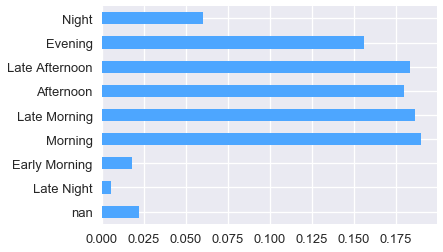

In [118]:
y_2007_df.DepTimeCategory.value_counts(dropna=False,normalize=True).sort_index()\
            .plot(kind='barh',color=base_color);

## 5.1 ArrTimeCategory

In [119]:
y_2007_df['ArrTimeCategory'] = y_2007_df.loc[: ,'ArrTime'].apply(get_part_of_day)

#### make ArrTimeCategory into category with sorted order

In [120]:
day_categories = ['Late Night','Early Morning','Morning','Late Morning',
                 'Afternoon','Late Afternoon','Evening','Night']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    day_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_categories)
    y_2007_df['ArrTimeCategory'] = y_2007_df['ArrTimeCategory'].astype(day_classes)
else: # pre-v0.21
    y_2007_df['ArrTimeCategory'] = y_2007_df['ArrTimeCategory'].astype('category', ordered = True,
                                                         categories = day_categories)

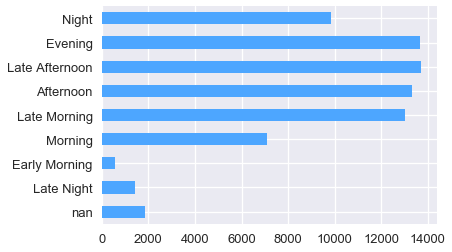

In [121]:
y_2007_df.ArrTimeCategory.value_counts(dropna=False).sort_index().plot(kind='barh',color=base_color);

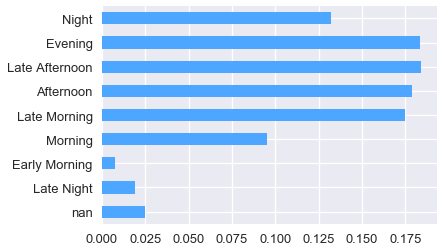

In [122]:
y_2007_df.ArrTimeCategory.value_counts(dropna=False,normalize=True).sort_index()\
        .plot(kind='barh',color=base_color);

# 6. Exploring Cancelled -- Part One

In [123]:
y_2007_df.Cancelled.value_counts(dropna=False,normalize=False)

0    72815
1     1654
Name: Cancelled, dtype: int64

In [124]:
y_2007_df.Cancelled.value_counts(dropna=False,normalize=True)

0    0.977789
1    0.022211
Name: Cancelled, dtype: float64

- There is no null values.
- Only 2% of flights are cancelled.
**(Result is dependent on random sampling)**

- Also notice that there are only two values 0s and 1s. Therefore convert Cancelled to bool

In [125]:
# changing Cancelled type to boolean
y_2007_df.Cancelled = y_2007_df.Cancelled.astype('bool')

In [126]:
# Test
y_2007_df.Cancelled.value_counts(dropna=False,normalize=True)

False    0.977789
True     0.022211
Name: Cancelled, dtype: float64

### CancellationCode

In [127]:
y_2007_df.CancellationCode.unique()

array([nan, 'B', 'A', 'C'], dtype=object)

#### Cancellation Code Legend
> A: carrier <br>
> B: weather <br>
> C: NAS <br>
> D: security <br>

In [128]:
cancelled_true_cols = ['Cancelled','CancellationCode','DepTime','ArrTime']

In [129]:
y_2007_df[y_2007_df.Cancelled==True][cancelled_true_cols].sample(10)

,Cancelled,CancellationCode,DepTime,ArrTime
6436,True,A,NaT,NaT
72667,True,A,NaT,NaT
26865,True,B,NaT,NaT
57466,True,A,NaT,NaT
16535,True,B,NaT,NaT
39018,True,B,NaT,NaT
63119,True,A,NaT,NaT
37170,True,B,NaT,NaT
49315,True,C,NaT,NaT
494,True,C,NaT,NaT


- Notice that when Cancelled is True, there is a corresponding reason for this cancellation <br>
through CancellationCode column. The columns DepTime and ArrTime have null values. This makes <br>
sense because flight is cancelled.

#### Define
- When Cancelled==True, is there a corresponding CancellationCode?

#### Code and Test

In [130]:
y_2007_df[y_2007_df.Cancelled==True][cancelled_true_cols].shape[0]

1654

In [131]:
y_2007_df.CancellationCode.value_counts(dropna=False)

NaN    72814
A        695
B        647
C        313
Name: CancellationCode, dtype: int64

- As seen from above if you add total values of A,B,C and D, it tallies with total number of data when Cancelled==True. Therefore, we can conclude that when Cancelled==True, there is a corresponding CancellationCode.

In [132]:
y_2007_df[(y_2007_df.Cancelled==True) & (y_2007_df.CancellationCode.isnull())].shape[0]

0

- Another test. If the answer is 0, then we can definitely conclude that when Cancelled==True, there is a corresponding CancellationCode.

#### Define
- When Cancelled==True, are all DepTime and ArrTime null?

#### Code

In [133]:
y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.DepTime.isnull())].shape[0]

0

In [134]:
y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.DepTime.isnull())][cancelled_true_cols]

,Cancelled,CancellationCode,DepTime,ArrTime


- There are cases when DepTime is not null when Cancelled is True. Need to clean this data. Need to set DepTime to null when Cancelled is True

In [135]:
y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.ArrTime.isnull())].shape[0]

0

- All ArrTime is null when Cancelled is True (for this random sample). But I will provide code to clean this data. 

In [136]:
# get index that have problematic DepTime
tofix_index = y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.DepTime.isnull())].index

In [137]:
# When Cancelled is True, change DepTime to NaT (null)
y_2007_df.loc[tofix_index,'DepTime'] = y_2007_df.loc[tofix_index,'DepTime'].apply(lambda x: pd.NaT)

In [138]:
tofix_index = y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.ArrTime.isnull())].index

In [139]:
tofix_index

Int64Index([], dtype='int64')

In [140]:
# When Cancelled is True, change ArrTime to NaT (null)
y_2007_df.loc[tofix_index,'ArrTime'] = y_2007_df.loc[tofix_index,'ArrTime'].apply(lambda x: pd.NaT)

#### Test

In [141]:
y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.DepTime.isnull())].shape[0]

0

In [142]:
y_2007_df[(y_2007_df.Cancelled==True) &\
          (~y_2007_df.ArrTime.isnull())].shape[0]

0

- When Cancelled==True, all DepTime and ArrTime is null

# 7. Exploring CancellationCode


- From previous discussion, we found out that when Cancelled==True, there is a corresponding CancellationCode. In this section we'll explore CancellationCode when Cancelled==False.

In [143]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.CancellationCode.isnull())][cancelled_true_cols].sample(10)

,Cancelled,CancellationCode,DepTime,ArrTime
57058,False,NaN,2007-08-10 10:07:00,2007-08-10 11:27:00
27852,False,NaN,2007-05-30 07:00:00,2007-05-30 08:02:00
18055,False,NaN,2007-02-06 09:41:00,2007-02-06 11:35:00
47914,False,NaN,2007-11-23 16:32:00,2007-11-23 18:32:00
65456,False,NaN,2007-04-07 05:55:00,2007-04-07 09:25:00
7537,False,NaN,2007-12-13 06:26:00,2007-12-13 07:49:00
43942,False,NaN,2007-04-27 19:12:00,2007-04-27 22:35:00
17631,False,NaN,2007-11-03 13:34:00,2007-11-03 18:30:00
510,False,NaN,2007-10-17 07:03:00,2007-10-17 08:11:00
9937,False,NaN,2007-12-21 21:23:00,2007-12-21 22:46:00


In [144]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.CancellationCode.isnull())].shape[0], y_2007_df.shape[0]

(72814, 74469)

In [145]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.CancellationCode.isnull())].shape[0]

1

In [146]:
y_2007_df.CancellationCode.value_counts(dropna=False)

NaN    72814
A        695
B        647
C        313
Name: CancellationCode, dtype: int64

- From the above data, when Cancellation is False, all CancellationCode is null. (Result dependent on random sampling). This is the result we want.

# 8. Exploring Diverted

In [147]:
cols = ['DepTime','ArrTime','Cancelled','CancellationCode','Diverted']

#### When Diverted == 1 and when Diverted == 0

In [148]:
y_2007_df[y_2007_df.Diverted==1][cols].sample(3)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
32713,2007-02-09 09:38:00,NaT,False,NaN,1
20016,2007-08-07 13:18:00,NaT,False,NaN,1
36948,2007-10-11 16:35:00,NaT,False,NaN,1


In [149]:
y_2007_df[y_2007_df.Diverted==0][cols].sample(3)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
52983,2007-03-05 18:00:00,2007-03-05 20:08:00,False,NaN,0
39235,2007-12-20 14:43:00,2007-12-20 16:30:00,False,NaN,0
58732,2007-12-03 12:26:00,2007-12-03 13:39:00,False,NaN,0


In [150]:
# Number of data when diverted == 1
y_2007_df[y_2007_df.Diverted==1][cols].shape[0],y_2007_df[y_2007_df.Diverted==0][cols].shape[0]

(177, 74292)

In [151]:
y_2007_df.Diverted.value_counts(dropna=False)

0    74292
1      177
Name: Diverted, dtype: int64

In [152]:
y_2007_df.Diverted.value_counts(dropna=False,normalize=True)

0    0.997623
1    0.002377
Name: Diverted, dtype: float64

>- 99.8% is when Diverted is 0.
>- Diverted==1 is 0.2%.
>- There is no null values.
> ##### (Result is dependent on random sampling)

#### When Diverted==1 and ArrTime is null / non-null

In [153]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(y_2007_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
406,2007-07-14 08:55:00,NaT,False,NaN,1
1934,2007-02-15 16:39:00,NaT,False,NaN,1
2289,2007-07-29 13:46:00,NaT,False,NaN,1
2662,2007-04-03 06:48:00,NaT,False,NaN,1
2797,2007-04-01 11:49:00,NaT,False,NaN,1


In [154]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(y_2007_df.ArrTime.isnull())][cols].shape[0],y_2007_df[y_2007_df.Diverted==1][cols].shape[0]

(177, 177)

- This situation (Diverted==1 and ArrTime is null) happens around 80% of the time. (Result is dependent on random sampling). This is a logical situation. When a plane is Diverted, there is no ArrTime. 

In [155]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted


In [156]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.ArrTime.isnull())][cols].shape[0], y_2007_df[y_2007_df.Diverted==1][cols].shape[0]

(0, 177)

- The proportion of non-null ArrTime given Diverted==1 is around 20%. (Result is dependent on random sampling). This is not logical. Therefore, I will clean this data. I Will make ArrTime to null when Diverted==1, which I will do below

-- **Cleaning Data**

In [157]:
indx_to_clean = y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.ArrTime.isnull())][cols].index

In [158]:
for indx in indx_to_clean:
    y_2007_df.loc[indx,'ArrTime'] = pd.NaT

In [159]:
# Test and Done!
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.ArrTime.isnull())][cols].shape[0], y_2007_df[(y_2007_df.Diverted==1)\
          &(y_2007_df.ArrTime.isnull())][cols].shape[0]

(0, 177)

#### When Diverted==1 and DepTime is null / non-null

In [160]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(y_2007_df.DepTime.isnull())].shape[0]

0

In [161]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())].shape[0]

177

In [162]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())][cols].sample(10)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
34735,2007-04-24 13:00:00,NaT,False,NaN,1
26445,2007-06-05 15:26:00,NaT,False,NaN,1
65316,2007-06-25 07:31:00,NaT,False,NaN,1
23683,2007-06-08 19:30:00,NaT,False,NaN,1
44412,2007-08-19 07:20:00,NaT,False,NaN,1
28777,2007-03-23 19:13:00,NaT,False,NaN,1
4754,2007-02-11 11:52:00,NaT,False,NaN,1
53725,2007-07-25 16:06:00,NaT,False,NaN,1
68982,2007-08-23 21:16:00,NaT,False,NaN,1
4133,2007-01-31 08:16:00,NaT,False,NaN,1


- Note that when Diverted==1, all ArrTime is null and all DepTime is non-null. 

#### When Diverted==1 and DepTime non-null and Cancelled is True / False

In [163]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())\
          &(y_2007_df.Cancelled==False)][cols].sample(5)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
60849,2007-07-29 11:25:00,NaT,False,NaN,1
74254,2007-04-13 12:16:00,NaT,False,NaN,1
52073,2007-06-29 21:23:00,NaT,False,NaN,1
23486,2007-03-26 20:25:00,NaT,False,NaN,1
28833,2007-03-21 14:27:00,NaT,False,NaN,1


In [164]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())\
          &(y_2007_df.Cancelled==False)][cols].shape[0]

177

In [165]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())\
          &(y_2007_df.Cancelled==True)][cols]

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted


In [166]:
y_2007_df[(y_2007_df.Diverted==1)\
          &(~y_2007_df.DepTime.isnull())\
          &(y_2007_df.Cancelled==True)][cols].shape[0]

0

- This above test yields an important insight! planes that are diverted are not cancelled! <br><br>

# 9. Exploring Cancelled -- Part Two

In [167]:
cols = ['DepTime','ArrTime','Cancelled','CancellationCode','Diverted']

#### When Cancelled==True, we expect all DepTime and ArrTime is null

In [168]:
y_2007_df[(y_2007_df.Cancelled==True)\
          & (y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
49,NaT,NaT,True,B,0
121,NaT,NaT,True,A,0
185,NaT,NaT,True,A,0
332,NaT,NaT,True,B,0
494,NaT,NaT,True,C,0


In [169]:
y_2007_df[(y_2007_df.Cancelled==True)\
          & (y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())][cols].shape[0]

1654

In [170]:
y_2007_df.Cancelled.value_counts(dropna=False)

False    72815
True      1654
Name: Cancelled, dtype: int64

- From the result above, we can be sure at this point that when Cancelled==True, DepTime and ArrTime is null. (for this data of random sampling)

#### When Cancelled==False, we expect DepTime and ArrTime is not null

In [171]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
0,2007-08-02 16:25:00,2007-08-02 17:56:00,False,NaN,0
1,2007-09-01 19:23:00,2007-09-01 20:59:00,False,NaN,0
2,2007-03-04 14:05:00,2007-03-04 16:02:00,False,NaN,0
3,2007-08-30 12:37:00,2007-08-30 21:15:00,False,NaN,0
4,2007-04-25 17:35:00,2007-04-25 19:27:00,False,NaN,0


In [172]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())].shape[0]

72607

- This is what we expected. When Cancelled==False, DepTime and ArrTime is not null. This condition represent a bulk of our data, which is good.

#### When Cancelled==False and DepTime is null and ArrTime is not null
- Rows with this condition shouldn't be in our data. Therefore, drop these rows.

In [173]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
621,NaT,2007-12-14 05:58:00,False,NaN,0
2387,NaT,2007-05-25 05:29:00,False,NaN,0
51762,NaT,2007-07-02 01:30:00,False,NaN,0
56051,NaT,2007-07-18 07:40:00,False,NaN,0
67301,NaT,2007-11-30 05:37:00,False,NaN,0


In [174]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())][cols].shape[0]

6

In [175]:
indx_to_drop = y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())].index

In [176]:
y_2007_df.drop(index=indx_to_drop,axis=0,inplace=True)

In [177]:
#Test
y_2007_df[(y_2007_df.Cancelled==False)\
          & (y_2007_df.DepTime.isnull())
          & (~y_2007_df.ArrTime.isnull())][cols].shape[0]

0

#### When Cancelled==False and DepTime is not null and ArrTime is null
- ArrTime shouldn't be null if Diverted==0. If Diverted==1 and ArrTime is null, it is O.K

In [178]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==1)][cols].sample(5)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
9522,2007-06-27 14:49:00,NaT,False,NaN,1
27364,2007-08-10 14:50:00,NaT,False,NaN,1
26037,2007-10-15 14:57:00,NaT,False,NaN,1
20737,2007-06-27 08:57:00,NaT,False,NaN,1
53193,2007-10-27 22:18:00,NaT,False,NaN,1


In [179]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==1)][cols].shape[0]

177

- This is O.K. ArrTime is null and Diverted==1. Because the plane is diverted, there is no information on ArrTime.

In [180]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==0)][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
3384,2007-07-29 20:28:00,NaT,False,NaN,0
3907,2007-06-09 21:26:00,NaT,False,NaN,0
15698,2007-07-01 23:11:00,NaT,False,NaN,0
18464,2007-07-09 20:55:00,NaT,False,NaN,0
26315,2007-02-06 18:17:00,NaT,False,NaN,0


In [181]:
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==0)][cols].shape[0]

25

- This is not O.K. There is no Cancellation and no Diversion. ArrTime shouldn't be null. Drop these rows.

In [182]:
indx_to_drop = y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==0)].index

In [183]:
y_2007_df.drop(index=indx_to_drop,axis=0,inplace=True)

In [184]:
# Test
y_2007_df[(y_2007_df.Cancelled==False)\
          & (~y_2007_df.DepTime.isnull())
          & (y_2007_df.ArrTime.isnull())
          & (y_2007_df.Diverted==0)][cols].shape[0]

0

# 10. Exploring Delays

In [185]:
cols_delays = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',\
               'ArrDelayM','DepDelayM']

In [186]:
y_2007_df[cols_delays].corr()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
CarrierDelay,1.000000,-0.011080,0.015725,-0.003649,0.020486,0.531514,0.557488
WeatherDelay,-0.011080,1.000000,0.048792,-0.001531,0.026360,0.299382,0.289645
NASDelay,0.015725,0.048792,1.000000,0.002298,0.052217,0.501147,0.326856
SecurityDelay,-0.003649,-0.001531,0.002298,1.000000,0.008432,0.038176,0.039425
LateAircraftDelay,0.020486,0.026360,0.052217,0.008432,1.000000,0.625104,0.655452
ArrDelayM,0.531514,0.299382,0.501147,0.038176,0.625104,1.000000,0.928036
DepDelayM,0.557488,0.289645,0.326856,0.039425,0.655452,0.928036,1.000000


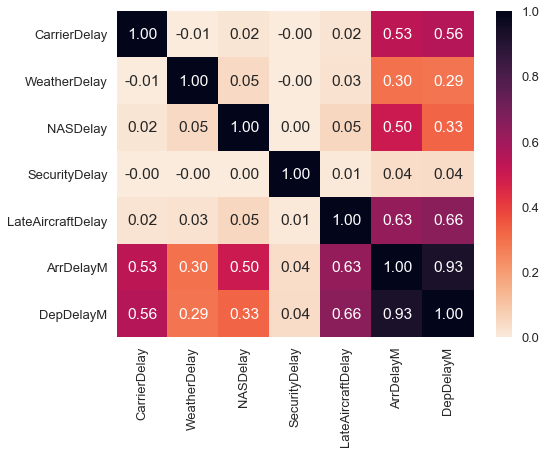

In [187]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
sb.heatmap(y_2007_df[cols_delays].corr(),annot=True,cmap='rocket_r',fmt='.2f',vmin=0);

From the above heatmap we can see that:
- a strong correlation between ArrDelayM and DepDelayM.
- a strong correlation between CarrierDelay and ArrDelayM and DepDelayM.
- a correlation between NASDelay and ArrDelayM.
- a correlation between LateAircraftDelay and ArrDelayM and DepDelayM.

#### when both ArrDelayM and DepDelayM is minus

In [188]:
y_2007_df[(y_2007_df.DepDelayM<=0)\
         & (y_2007_df.ArrDelayM<=0)][cols_delays].sample(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
23868,0,0,0,0,0,-22.0,-10.0
61773,0,0,0,0,0,-6.0,-1.0
48120,0,0,0,0,0,-1.0,0.0
7287,0,0,0,0,0,0.0,-8.0
32628,0,0,0,0,0,-16.0,-5.0
16612,0,0,0,0,0,-15.0,-1.0
66877,0,0,0,0,0,-5.0,-5.0
231,0,0,0,0,0,-20.0,-6.0
15924,0,0,0,0,0,-10.0,-6.0
51739,0,0,0,0,0,0.0,0.0


- The above table is logical, since CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay are null when there are no delays. There are no delays because ArrDelayM and DepDelayM are negative. 
- From my table, all  CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay columns are null. This depends on random sampling. Therefore it might be different for your dataset. Not all rows are null when there are no delays.

#### when both ArrDealyM and DepDelayM is positive

In [189]:
y_2007_df[(y_2007_df.DepDelayM>0)\
         & (y_2007_df.ArrDelayM>0)][cols_delays].sample(20)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
40309,0,0,16,0,20,36.0,20.0
8044,0,0,0,0,36,36.0,22.0
6318,0,0,0,0,0,1.0,4.0
18050,2,0,1,0,25,28.0,27.0
30304,0,0,16,0,0,16.0,3.0
7910,0,0,0,0,0,12.0,6.0
56206,0,0,17,0,0,17.0,3.0
53568,0,0,89,0,0,89.0,88.0
42261,0,0,0,0,0,1.0,1.0
61701,0,29,0,0,0,29.0,30.0


In [190]:
y_2007_df[(y_2007_df.DepDelay>0)\
         & (y_2007_df.ArrDelay>0)][cols_delays].shape[0] , y_2007_df.shape[0]

(24387, 74438)

- From the above table, the columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay do not give rise to a logical ArrDelayM and DepDelayM.

- This consists of about 30% of our data. If we drop these rows, we will drop many useful data.

- Also, we need more insider knowledge if we want to re-calculate these rows into a logical ones.

- Therefore instead of dropping these rows, I will drop columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay.

#### Dropping CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay columns.
- Although there are some strong correlations between these columns and ArrDelayM and DepDelayM columns, we need to drop them by the reasonings we just gave above.

In [191]:
#y_2007_df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',\
#                       'LateAircraftDelay'],axis=1,inplace=True)

# 11. Exploring Carriers table
- we need to merge two tables: carriers_df and y_2007_df

In [192]:
y_2007_df.UniqueCarrier.head()

0    EV
1    AS
2    NW
3    DL
4    US
Name: UniqueCarrier, dtype: object

- The UniqueCarrier from y_2007_df is somehow a code for carriers. We need the description of the carrier to make the data intelligible to human readers. Can we get this description from carriers_df?

In [193]:
carriers_df.Code.isin(list(y_2007_df.UniqueCarrier)).sum()

20

- The answer is Yes. We can find Carrier Description from carriers_df. This is shown below.

In [194]:
carriers_df[carriers_df.Code.isin(list(y_2007_df.UniqueCarrier))]

,Code,Description
84,9E,Pinnacle Airlines Inc.
100,AA,American Airlines Inc.
206,AQ,Aloha Airlines Inc.
221,AS,Alaska Airlines Inc.
263,B6,JetBlue Airways
377,CO,Continental Air Lines Inc.
441,DL,Delta Air Lines Inc.
505,EV,Atlantic Southeast Airlines
517,F9,Frontier Airlines Inc.
537,FL,AirTran Airways Corporation


- Therefore we need to merge carriers_df and y_2007_df. Before merging though, we need to do some data cleaning:

- First, the Description from index 1308 above is a bit too long. We need to fix it.
- Second, we need to change column names of carriers_df before merging.

#### Define
- Index 1308 of carriers_df has long Description

#### Code

In [195]:
print(carriers_df.loc[1308].values)

['US'
 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)']


- Change the above description into 'US Airways Inc.'

In [196]:
carriers_df.iloc[1308]['Description'] = 'US Airways Inc.'

#### Test

In [197]:
print(carriers_df.loc[1308].values)

['US' 'US Airways Inc.']


#### Define
- Before we can merge y_2007_df and carriers_df, we need to change the column names of carriers_df

#### Code

In [198]:
carriers_df.columns

Index(['Code', 'Description'], dtype='object')

In [199]:
carriers_df.columns = ['UniqueCarrier','CarrierDescription']

#### Test

In [200]:
carriers_df.columns

Index(['UniqueCarrier', 'CarrierDescription'], dtype='object')

#### Define
- Merge y_2007_df and carriers_df

#### Code

In [201]:
y_2007_df = pd.merge(carriers_df,y_2007_df,on='UniqueCarrier')

#### Define

In [202]:
y_2007_df[['UniqueCarrier','CarrierDescription']].sample(5)

,UniqueCarrier,CarrierDescription
12626,B6,JetBlue Airways
21214,EV,Atlantic Southeast Airlines
44028,OO,Skywest Airlines Inc.
46547,UA,United Air Lines Inc.
51465,US,US Airways Inc.


#### Carriers Distribution
major airlines: https://en.wikipedia.org/wiki/Major_airlines_of_the_United_States

In [203]:
y_2007_df.CarrierDescription.value_counts(dropna=False)

Southwest Airlines Co.          11751
American Airlines Inc.           6452
Skywest Airlines Inc.            6074
American Eagle Airlines Inc.     5337
US Airways Inc.                  4862
United Air Lines Inc.            4786
Delta Air Lines Inc.             4672
Expressjet Airlines Inc.         4239
Northwest Airlines Inc.          4146
Continental Air Lines Inc.       3232
Mesa Airlines Inc.               2958
Atlantic Southeast Airlines      2869
AirTran Airways Corporation      2619
Pinnacle Airlines Inc.           2613
Comair Inc.                      2338
JetBlue Airways                  1875
Alaska Airlines Inc.             1655
Frontier Airlines Inc.            980
Hawaiian Airlines Inc.            524
Aloha Airlines Inc.               456
Name: CarrierDescription, dtype: int64

In [204]:
y_2007_df.CarrierDescription.value_counts(dropna=False,normalize=True)

Southwest Airlines Co.          0.157863
American Airlines Inc.          0.086676
Skywest Airlines Inc.           0.081598
American Eagle Airlines Inc.    0.071697
US Airways Inc.                 0.065316
United Air Lines Inc.           0.064295
Delta Air Lines Inc.            0.062764
Expressjet Airlines Inc.        0.056947
Northwest Airlines Inc.         0.055697
Continental Air Lines Inc.      0.043419
Mesa Airlines Inc.              0.039738
Atlantic Southeast Airlines     0.038542
AirTran Airways Corporation     0.035184
Pinnacle Airlines Inc.          0.035103
Comair Inc.                     0.031409
JetBlue Airways                 0.025189
Alaska Airlines Inc.            0.022233
Frontier Airlines Inc.          0.013165
Hawaiian Airlines Inc.          0.007039
Aloha Airlines Inc.             0.006126
Name: CarrierDescription, dtype: float64

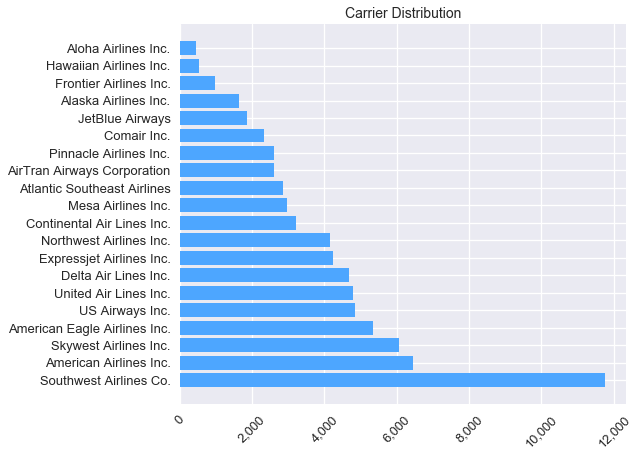

In [205]:
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(1,1,1)

plt.barh(y_2007_df.CarrierDescription.value_counts().index,y_2007_df.CarrierDescription.value_counts())

plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=45);
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));
plt.title('Carrier Distribution',fontsize=14);

# 12. Exploring Airports table

In [206]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


#### Observations on airports_df:
- iata is a unique id for an airport. The equivalent ids in y_2007_df is Origin and Dest columns. So if you want to merge these two data frames (airport_df and y_2007_df), merge on iata and Origin or iata and Dest.
- The dataframe contains lat, long data. This pair of data will pinpoint the location of an airport on a map.
- The dataframe also contains the airport's name, city state and country.

#### Define
- Filter Airports that are located in the USA. Identify probelmatic data and then rectify  them.

#### Code

In [207]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.iata.isnull())]

,iata,airport,city,state,country,lat,long


In [208]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.airport.isnull())]

,iata,airport,city,state,country,lat,long


In [209]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.lat.isnull())]

,iata,airport,city,state,country,lat,long


In [210]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.long.isnull())]

,iata,airport,city,state,country,lat,long


- Columns iata, airport, country, lat and long have no null values. So all good for these columns!

In [211]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.city.isnull())]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


- The rows in table above have city and state null values. Fill them manually!

- I google for the location of city and state of the above airports. Here is what I've found:<br><br>
CLD: North San Diego County, California (CA) <br>
HHH: Hilton Head Island, South Carolina (SC) <br>
MIB: Minot, North Dakota (ND) <br>
MQT: Marquette, Michigan (MI) <br>
RCA: Rapid City, South Dakota (SD) <br>
RDR: Grand Forks, North Dakota (ND) <br>
SCE: Happy Valley, Pennsylvania (PA) <br>
SKA: Spokane, Washington (WA)

#### Define
- Fill null city and state values with the above data gathered from a search engine.

#### Code

In [212]:
city_state_null_index = airports_df[airports_df.city.isnull() & airports_df.country.str.contains('USA')].index
city_state_null_index

Int64Index([1136, 1715, 2251, 2312, 2752, 2759, 2900, 2964], dtype='int64')

In [213]:
state_list = ['CA','SC','ND','MI','SD','ND','PA','WA']
city_list = ['North San Diego County','Hilton Head Island','Minot','Marquette',
             'Rapid City','Grand Forks','Happy Valley','Spokane']
for i,indx in enumerate(city_state_null_index):
    #print(str(i) + '--' + str(indx))
    airports_df.loc[indx,'city'] = city_list[i]
    airports_df.loc[indx,'state'] = state_list[i]

#### Test

In [214]:
airports_df[airports_df.city.isnull() & airports_df.country.str.contains('USA')]

,iata,airport,city,state,country,lat,long


In [215]:
airports_df.loc[city_state_null_index]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,North San Diego County,CA,USA,33.127231,-117.278727
1715,HHH,Hilton Head,Hilton Head Island,SC,USA,32.224384,-80.697629
2251,MIB,Minot AFB,Minot,ND,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,Marquette,MI,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,Rapid City,SD,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,Grand Forks,ND,USA,47.961167,-97.401167
2900,SCE,University Park,Happy Valley,PA,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,Spokane,WA,USA,47.615058,-117.655803


- Now the airports_df contains rows with filled data. Please note that this only applies to airports located in the USA.
- Airports located in the USA are what we are interested in for this project.

#### Define
- Remove rows that are not relevant to this project

#### Code

In [216]:
airports_df[(airports_df.city.isnull()) | (airports_df.state.isnull())]

,iata,airport,city,state,country,lat,long
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
3001,SPN,Tinian International Airport,NaN,NaN,N Mariana Islands,14.996111,145.621384
3355,YAP,Yap International,NaN,NaN,Federated States of Micronesia,9.516700,138.100000


In [217]:
city_state_null_filter = (airports_df.city.isnull()) | (airports_df.state.isnull())
city_state_null_filter.sum()

4

In [218]:
airports_df.shape[0]

3376

In [219]:
# now only contains airport with city and state filled
airports_df = airports_df[~city_state_null_filter]

#### Test

In [220]:
airports_df[(airports_df.city.isnull()) | (airports_df.state.isnull())]

,iata,airport,city,state,country,lat,long


In [221]:
airports_df.shape[0]

3372

# 13. Exploring y_2007_df and airports_df

## 13.1 Origin
- Origin Airport id which equals to iata

In [222]:
cols = ['Origin','CarrierDescription','DepTime','DepTimeCategory','DepDelayM','Cancelled','Diverted']

In [223]:
y_2007_df[cols].sample(5)

,Origin,CarrierDescription,DepTime,DepTimeCategory,DepDelayM,Cancelled,Diverted
66027,DEN,Southwest Airlines Co.,2007-07-18 20:16:00,Evening,11.0,False,0
37720,PVD,Comair Inc.,2007-09-06 11:45:00,Late Morning,-5.0,False,0
58893,OMA,Southwest Airlines Co.,2007-12-12 08:52:00,Morning,2.0,False,0
65551,ABQ,Southwest Airlines Co.,2007-12-04 17:52:00,Late Afternoon,-8.0,False,0
56590,TPA,Southwest Airlines Co.,2007-04-03 19:47:00,Evening,17.0,False,0


- The above table is missing one column to be human-friendly. It is missing the Airport column. Now we have only airport code. Origin column contains airport code. We need to merge y_2007_df with airports_df to get this data along with lat and long data for airport's position on the map.

In [224]:
y_2007_df.Origin.isnull().sum()

0

In [225]:
y_2007_df.Origin.nunique()

295

- There is no null values of Origin inside y_2007_df
- There are around 290s unique Origin inside y_2007_df. (Result depends on random sampling)
- Origin is airport_id or iata inside airports_df

#### Define
- Are Origin inside y_2007_df are also represented inside airports_df?

#### Code

In [226]:
# make a copy of airports_df 
airports_origin_df = airports_df.copy()

In [227]:
airports_origin_df.iata.nunique(), y_2007_df.Origin.nunique()

(3372, 295)

- One important to note: `Origin` is an airport id. `iata` is also an airport id.
- There are around 3,000s unique airport id inside airports_origin_df.
- There are only around 290s unique airport id inside y_2007_df.
- So make airport_origin_df to contain only airport id from y_2007_df. This I will do now.

In [228]:
origin_filter = airports_origin_df.iata.isin(list(y_2007_df.Origin))
origin_filter.sum()

295

In [229]:
# I'm only interested in the Origin in y_2007_df
airports_origin_df = airports_origin_df[origin_filter]

#### Test

In [230]:
airports_origin_df.iata.nunique()

295

In [231]:
airports_origin_df.head()

,iata,airport,city,state,country,lat,long
759,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
760,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
762,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
764,ABY,Southwest Georgia Regional,Albany,GA,USA,31.535515,-84.194473
767,ACK,Nantucket Memorial,Nantucket,MA,USA,41.253052,-70.060181


- Great! I now have a dataframe that contains detailed information about airports. Not just airport ids.
- I will merge airports_origins_df and y_2007_df later. After merging, I will have detailed airport information.

## 13.2 Dest
- Destination Airport id which equals to iata

In [232]:
cols = ['Dest','CarrierDescription','ArrTime','ArrTimeCategory','ArrDelayM','Cancelled','Diverted']

In [233]:
y_2007_df[cols].sample(5)

,Dest,CarrierDescription,ArrTime,ArrTimeCategory,ArrDelayM,Cancelled,Diverted
35429,BHM,Northwest Airlines Inc.,2007-09-10 20:19:00,Evening,3.0,False,0
26313,BOS,AirTran Airways Corporation,2007-01-05 16:31:00,Late Afternoon,11.0,False,0
27523,HNL,Hawaiian Airlines Inc.,2007-11-26 21:22:00,Night,-7.0,False,0
71133,LAX,Expressjet Airlines Inc.,2007-11-01 21:30:00,Night,40.0,False,0
64700,PHX,Southwest Airlines Co.,2007-04-08 10:18:00,Late Morning,-17.0,False,0


- Similarly, the above above table is missing the Airport column. Now let's work towards that -- having detailed airport information in our table.

In [234]:
y_2007_df.Dest.isnull().sum()

0

In [235]:
y_2007_df.Dest.nunique()

297

- There is no null values of Dest inside y_2007_df
- There are around 290s unique Dest inside y_2007_df. (Result depends on random sampling)
- Dest is airport_id or iata inside airports_df

#### Define
- Are Dest inside y_2007_df are also represented inside airports_df?

#### Code

In [236]:
# make a copy of airports_df 
airports_destination_df = airports_df.copy()

In [237]:
airports_destination_df.iata.nunique(), y_2007_df.Dest.nunique()

(3372, 297)

- One important to note: `Dest` is an airport id. `iata` is also an airport id.
- There are around 3,000s unique airport id inside airports_destination_df.
- There are only around 290s unique airport id inside y_2007_df.
- So make airport_destination_df to contain only airport id from y_2007_df. This I will do now.

In [238]:
dest_filter = airports_destination_df.iata.isin(list(y_2007_df.Dest))
dest_filter.sum()

297

In [239]:
# I'm only interested in the Dest in y_2007_df
airports_destination_df = airports_destination_df[dest_filter]

#### Test

In [240]:
airports_destination_df.iata.nunique()

297

In [241]:
airports_destination_df.head()

,iata,airport,city,state,country,lat,long
759,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
760,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
762,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
764,ABY,Southwest Georgia Regional,Albany,GA,USA,31.535515,-84.194473
767,ACK,Nantucket Memorial,Nantucket,MA,USA,41.253052,-70.060181


- Great! I now have a dataframe that contains detailed information about airports. Not just airport ids.
- But there is an extra wrinkle. Is airports_origin_df and airports_destination_df identical?

## 13.3 airports_origin_df versus airports_destination_df identical?
#### Define
- find out if they are identical.
- if not, make them identical and then which dataframe do you choose?

#### Code

-- investigating airports_origin_df

In [242]:
(~airports_origin_df.iata.isin(list(airports_destination_df.iata))).sum()

2

- The above result is the number of airports in airports_origin_df that is not in airports_destination_df 

In [243]:
common_filter = airports_origin_df.iata.isin(list(airports_destination_df.iata))
common_filter.sum()

293

In [244]:
(~common_filter).sum()

2

In [245]:
airports_origin_df[~common_filter]

,iata,airport,city,state,country,lat,long
1149,CMX,Houghton County Memorial,Hancock,MI,USA,47.168417,-88.489061
1885,ISO,Kinston Regional Jetport At Stallin,Kinston,NC,USA,35.328079,-77.615526


- The airports above exist in airports_origin_df but NOT in airports_destination_df

-- Investigating airports_destination_df

In [246]:
(~airports_destination_df.iata.isin(list(airports_origin_df.iata))).sum()

4

In [247]:
common_filter = airports_destination_df.iata.isin(list(airports_origin_df.iata))
common_filter.sum()

293

In [248]:
(~common_filter).sum()

4

In [249]:
airports_destination_df[~common_filter]

,iata,airport,city,state,country,lat,long
1276,DLG,Dillingham,Dillingham,AK,USA,59.045412,-158.503339
1651,GST,Gustavus,Gustavus,AK,USA,58.424381,-135.707381
2331,MTH,Florida Keys Marathon,Marathon,FL,USA,24.726141,-81.051378
3096,TEX,Telluride Regional,Telluride,CO,USA,37.953759,-107.908480


- The airports above exist in airports_destination_df but not in airports_origin_df

#### Discussion
- Clearly, airports_origin_df and airports_destination_df are almost identical except for the few rows.
- Therefore, I will  remove a few rows from airports_origin_df and airports_destination_df. After which both tables will be identical.

#### Code

In [250]:
common_filter = airports_origin_df.iata.isin(list(airports_destination_df.iata))

In [251]:
# A few rows removed
airports_origin_df = airports_origin_df[common_filter]

In [252]:
common_filter = airports_destination_df.iata.isin(list(airports_origin_df.iata))

In [253]:
# A few rows removed
airports_destination_df = airports_destination_df[common_filter]

#### Test

In [254]:
(~airports_destination_df.iata.isin(list(airports_origin_df.iata))).sum()

0

- The above result proves that airports_origin_df and airports_destination_df are identical.

> **To simplify though, I will arbitrariy choose airports_origin_df for this project. From now on, I will only mention/use airports_origin_df.**

## 13.4 Merging y_2007_df and airports_origin_df

In [255]:
y_2007_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74438 entries, 0 to 74437
Data columns (total 31 columns):
UniqueCarrier         74438 non-null object
CarrierDescription    74438 non-null object
DepTime               72784 non-null datetime64[ns]
CRSDepTime            74438 non-null datetime64[ns]
ArrTime               72607 non-null datetime64[ns]
CRSArrTime            74431 non-null datetime64[ns]
FlightNum             74438 non-null int64
TailNum               74438 non-null object
ActualElapsedTime     72607 non-null float64
CRSElapsedTime        74429 non-null float64
AirTime               72607 non-null float64
ArrDelay              72607 non-null float64
DepDelay              72784 non-null float64
Origin                74438 non-null object
Dest                  74438 non-null object
Distance              74438 non-null int64
TaxiIn                74438 non-null int64
TaxiOut               74438 non-null int64
Cancelled             74438 non-null bool
CancellationCode      16

In [256]:
airports_origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 759 to 3360
Data columns (total 7 columns):
iata       293 non-null object
airport    293 non-null object
city       293 non-null object
state      293 non-null object
country    293 non-null object
lat        293 non-null float64
long       293 non-null float64
dtypes: float64(2), object(5)
memory usage: 18.3+ KB


- To merge the above tables, we have to rename columns in airports_origin_df. 
- Rename iata to Origin.
- Capitalize all column names.

In [257]:
# Changing column names and capitalize first letter 
# Note that Origin == iata
airports_origin_df.columns =['Origin','Airport','City','State','Country','Lat','Long']

In [258]:
airports_origin_df.columns

Index(['Origin', 'Airport', 'City', 'State', 'Country', 'Lat', 'Long'], dtype='object')

In [259]:
desired_cols = ['Origin','Airport','UniqueCarrier','CarrierDescription','City','State','Country',
                'Lat','Long']
airports_merged_df = pd.merge(airports_origin_df,y_2007_df,on='Origin')[desired_cols]

In [260]:
airports_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74431 entries, 0 to 74430
Data columns (total 9 columns):
Origin                74431 non-null object
Airport               74431 non-null object
UniqueCarrier         74431 non-null object
CarrierDescription    74431 non-null object
City                  74431 non-null object
State                 74431 non-null object
Country               74431 non-null object
Lat                   74431 non-null float64
Long                  74431 non-null float64
dtypes: float64(2), object(7)
memory usage: 5.7+ MB


- The merged dataframe is called airports_merged_df.
- The new dataframe's rows has increased from 290s rows to almost 70,000 rows.
- With this new dataframe -- airports_merged_df -- I want to find out how many Carriers each airport is operating. Then I will categorize airport based on the number of Carriers it is operating.
- Note the size of memory of airports_merged_df and y_2007_df. The former occupies 5.3 MB while the latter ocuupies 11.9 MB. 

In [261]:
airports_merged_df.sample(5)

,Origin,Airport,UniqueCarrier,CarrierDescription,City,State,Country,Lat,Long
34998,JFK,John F Kennedy Intl,B6,JetBlue Airways,New York,NY,USA,40.639751,-73.778926
4718,ATL,William B Hartsfield-Atlanta Intl,FL,AirTran Airways Corporation,Atlanta,GA,USA,33.640444,-84.426944
30044,HPN,Westchester Cty,MQ,American Eagle Airlines Inc.,White Plains,NY,USA,41.066958,-73.707574
55122,ORD,Chicago O'Hare International,UA,United Air Lines Inc.,Chicago,IL,USA,41.979595,-87.904464
62042,RDU,Raleigh-Durham International,YV,Mesa Airlines Inc.,Raleigh,NC,USA,35.877639,-78.787472


# 14. Airport Location and Categorizing Airport Size

## 14.1 Airport Location

In [262]:
airports_merged_df.Airport.nunique()

293

- There are 290s unique airport in the USA based on our dataframe. (Result may differ due to random sampling)

In [263]:
airports_merged_df[airports_merged_df.Airport.str.contains("Chicago O'Hare International")]\
                    ['CarrierDescription'].unique()

array(['American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways', 'Continental Air Lines Inc.',
       'Delta Air Lines Inc.', 'Atlantic Southeast Airlines',
       'American Eagle Airlines Inc.', 'Northwest Airlines Inc.',
       'Comair Inc.', 'Skywest Airlines Inc.', 'United Air Lines Inc.',
       'US Airways Inc.', 'Expressjet Airlines Inc.',
       'Mesa Airlines Inc.'], dtype=object)

In [264]:
airports_merged_df[airports_merged_df.Airport.str.contains("Chicago O'Hare International")]\
                    ['CarrierDescription'].nunique()

14

- Chicago O'Hare International operates around 14 Carriers in its airport. 

#### Define
- I will iterate a list of airports and calculate how many Carriers each airport operates.

#### Code

In [265]:
airport_unique_list = airports_merged_df.Airport.unique()

In [266]:
# For each airport, count carriers it carries.
airport_carriers_count_dict = {}
# airport_iata_dict={}
for row in tqdm(airport_unique_list):
    carriers_count = airports_merged_df[airports_merged_df.Airport.str.contains(row)]['CarrierDescription'].nunique()
    try:
        iata = airports_merged_df[airports_merged_df.Airport.str.contains(row)]['Origin'].values[0]
        airport_carriers_count_dict[iata] = carriers_count
    except:
        # if there are errors , no element will be appended to airport_carriers_count_dict.
        # it will print error
        print('error at: ' + row)   

 18%|█▊        | 52/293 [00:03<00:15, 15.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



error at: Merle K (Mudhole) Smith


 54%|█████▍    | 158/293 [00:12<00:11, 12.08it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



error at: Long Beach (Daugherty )


100%|██████████| 293/293 [00:22<00:00, 12.93it/s]


**Issue text string:** Merle K (Mudhole) Smith , Long Beach (Daugherty ) . use extract

In [267]:
# sort
airport_carriers_count = sorted(airport_carriers_count_dict.items(), key=operator.itemgetter(1))
# now no longer a dict. now is a list of tuples

In [268]:
# print 5 rows
for row in airport_carriers_count[:5]:
    print(row)

('ABI', 1)
('ABY', 1)
('ACT', 1)
('ACV', 1)
('ADK', 1)


In [269]:
# turned into dataframe
raw_data = {'Origin': list(zip(*airport_carriers_count))[0], 
            'CarriersCount': list(zip(*airport_carriers_count))[1]}
airport_count_carriers_df = pd.DataFrame(raw_data,columns=['Origin','CarriersCount'])
airport_count_carriers_df.sample(5)

,Origin,CarriersCount
141,CRP,4
237,PVD,12
150,RAP,4
203,MDT,8
110,YUM,2


In [270]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 3375
Data columns (total 7 columns):
iata       3372 non-null object
airport    3372 non-null object
city       3372 non-null object
state      3372 non-null object
country    3372 non-null object
lat        3372 non-null float64
long       3372 non-null float64
dtypes: float64(2), object(5)
memory usage: 210.8+ KB


In [271]:
airport_count_carriers_df.columns=['iata','CarriersCount']

In [272]:
airport_count_carriers_df = pd.merge(airport_count_carriers_df,airports_df,how='inner',on='iata')

In [273]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 8 columns):
iata             287 non-null object
CarriersCount    287 non-null int64
airport          287 non-null object
city             287 non-null object
state            287 non-null object
country          287 non-null object
lat              287 non-null float64
long             287 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.2+ KB


In [274]:
airport_count_carriers_df.sample(5)

,iata,CarriersCount,airport,city,state,country,lat,long
190,TYS,7,McGhee-Tyson,Knoxville,TN,USA,35.812487,-83.992856
271,RDU,15,Raleigh-Durham International,Raleigh,NC,USA,35.877639,-78.787472
199,GRR,8,Kent County International,Grand Rapids,MI,USA,42.880820,-85.522768
168,AZO,6,Kalamazoo County,Kalamazoo,MI,USA,42.234875,-85.552057
37,IYK,1,Inyokern,Inyokern,CA,USA,35.658843,-117.829512


- Good! Now I have CarriersCount for each airport and location details!
- It's time to visualize this data
- Note: I have around 280s airport data.

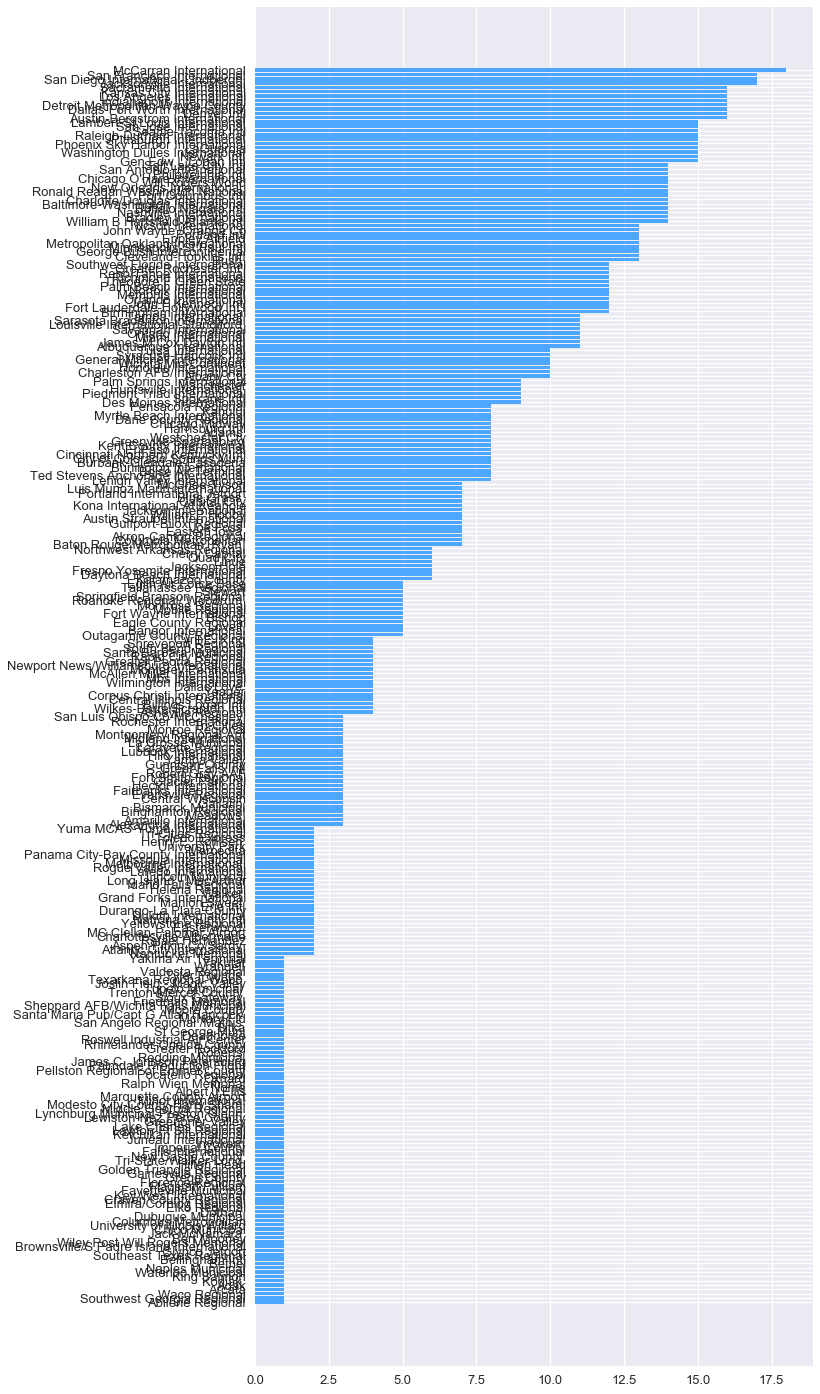

In [275]:
fig = plt.figure(figsize=(10,25))
ax1 = fig.add_subplot(1,1,1)
plt.barh(airport_count_carriers_df.airport,airport_count_carriers_df.CarriersCount);

- I have to many airport rows -- around 280s rows.
- Therefore need alternative plots other than barh to visualize data.
- First, I will use scatter plot. 
- Then I will use plotly.

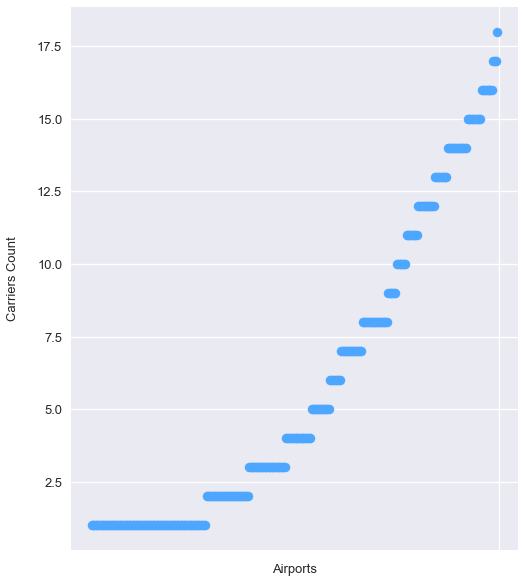

In [276]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)
plt.scatter(airport_count_carriers_df.airport,airport_count_carriers_df.CarriersCount)
plt.xticks('');
plt.ylabel('Carriers Count\n',fontsize=13)
plt.xlabel('Airports',fontsize=13);

- Enter Comment here

#### Now use plotly to visualize data

In [277]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 8 columns):
iata             287 non-null object
CarriersCount    287 non-null int64
airport          287 non-null object
city             287 non-null object
state            287 non-null object
country          287 non-null object
lat              287 non-null float64
long             287 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.2+ KB


In [278]:
airport_count_carriers_df['text'] = airport_count_carriers_df['airport'] + '' + airport_count_carriers_df['city'] +\
    ', ' + airport_count_carriers_df['state'] + '' + 'Count: ' + airport_count_carriers_df['CarriersCount'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = airport_count_carriers_df['long'],
        lat = airport_count_carriers_df['lat'],
        text = airport_count_carriers_df['text'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'round',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 1,
            color = airport_count_carriers_df['CarriersCount'],
            cmax = airport_count_carriers_df['CarriersCount'].max(),
            colorbar=dict(
                title="Number of Airline Carriers"
            )
        ))]

layout = dict(
        title = 'Number of Airline Carriers Operating in an Airport Origin<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='andy-airports-origin' )

> From the map above, most airports cluster on the East coast. There are also many airports in Alaska and Hawaii states.

#### Another look with cmin=10. Airports with at least 10 airline carriers

In [279]:
airport_count_carriers_df['text'] = airport_count_carriers_df['airport'] + '' + airport_count_carriers_df['city'] +\
    ', ' + airport_count_carriers_df['state'] + '' + 'Count: ' + airport_count_carriers_df['CarriersCount'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = airport_count_carriers_df['long'],
        lat = airport_count_carriers_df['lat'],
        text = airport_count_carriers_df['text'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'round',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 10,
            color = airport_count_carriers_df['CarriersCount'],
            cmax = airport_count_carriers_df['CarriersCount'].max(),
            colorbar=dict(
                title="Numbe of Airline Carriers"
            )
        ))]

layout = dict(
        title = 'Number of Airline Carriers Operating in an Airport Origin<br>cmin=10 -- lowest airport is 10<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='andy-airports2-origin' )

> With cmin=10, airports with at least 10 carriers tend to concentrate along coast lines, mid-west and Texas. Investigate the airports in the central areas such as ... 

## 14.2 Categorizing Airport Size
#### Define
- Now that we have information about how many Carriers each Airport operates, it is time to categorize Airport size based on how many Carriers it operates.
- First, merge airport_count_carriers_df and y_2007_df. I want the CarriersCount data.

#### Code

In [280]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 9 columns):
iata             287 non-null object
CarriersCount    287 non-null int64
airport          287 non-null object
city             287 non-null object
state            287 non-null object
country          287 non-null object
lat              287 non-null float64
long             287 non-null float64
text             287 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 22.4+ KB


In [281]:
columns_desired = list(y_2007_df.columns)
columns_desired.append('CarriersCount')

In [282]:
airport_count_carriers_df.columns = ['Origin','CarriersCount','airport','city','state','country'\
                         ,'lat','long','text']

In [283]:
#merge airport_count_carriers_df and y_2007_df
y_2007_df = pd.merge(y_2007_df,airport_count_carriers_df,on='Origin',how='inner')[columns_desired]

#### Test

In [284]:
y_2007_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74183 entries, 0 to 74182
Data columns (total 32 columns):
UniqueCarrier         74183 non-null object
CarrierDescription    74183 non-null object
DepTime               72539 non-null datetime64[ns]
CRSDepTime            74183 non-null datetime64[ns]
ArrTime               72365 non-null datetime64[ns]
CRSArrTime            74176 non-null datetime64[ns]
FlightNum             74183 non-null int64
TailNum               74183 non-null object
ActualElapsedTime     72365 non-null float64
CRSElapsedTime        74175 non-null float64
AirTime               72365 non-null float64
ArrDelay              72365 non-null float64
DepDelay              72539 non-null float64
Origin                74183 non-null object
Dest                  74183 non-null object
Distance              74183 non-null int64
TaxiIn                74183 non-null int64
TaxiOut               74183 non-null int64
Cancelled             74183 non-null bool
CancellationCode      16

- We have CarriersCount data in y_2007_df

#### Define
- Not it's time to categorize Airport size

#### Code

In [285]:
airport_count_carriers_df.CarriersCount.describe()

count    287.000000
mean       5.815331
std        5.001123
min        1.000000
25%        1.000000
50%        4.000000
75%        9.500000
max       18.000000
Name: CarriersCount, dtype: float64

In [286]:
percentile_25th = np.percentile(airport_count_carriers_df.CarriersCount,25)  # 25 percentilenp
percentile_50th = np.percentile(airport_count_carriers_df.CarriersCount,50)  # 50th percentile
percentile_75th = np.percentile(airport_count_carriers_df.CarriersCount,75)  # 75 percentile

In [287]:
def allocate_airport_sized(series):
    #print(series)
    row = series
    #if row <= 1:
    if row <= percentile_25th:
        #print('v_small_sized')
        return 'v_small_sized'
        #y_2007_df.loc[indx,'airport_sized'] = 'v_small_sized'
    elif percentile_25th < row <= percentile_50th:
    #elif 1 < row <= 10:
        #print('small_sized')
        return 'small_sized'
        #y_2007_df.loc[indx,'airport_sized'] = 'small_sized'
    elif percentile_50th < row <= percentile_75th:
    #elif 10 < row <= 14:
        #print('mid_sized')
        return 'mid_sized'
        #y_2007_df.loc[indx,'airport_sized'] = 'mid_sized'
    elif percentile_75th < row:
    #elif 14 < row <= 20:
        #print('big_sized')
        return 'big_sized'
        #y_2007_df.loc[indx,'airport_sized'] = 'big_sized'
    else:
        #print('eroor')
        return series

In [288]:
#y_2007_df['airport_sized'] = 0

In [289]:
y_2007_df['airport_sized'] = y_2007_df.CarriersCount.apply(allocate_airport_sized)

In [290]:
y_2007_df.airport_sized.value_counts()

big_sized        60576
mid_sized         8999
small_sized       3557
v_small_sized     1051
Name: airport_sized, dtype: int64

#### make `airport_sized` into category with sorted order

In [291]:
airport_size_categories = ['v_small_sized','small_sized','mid_sized','big_sized']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    airport_classes = pd.api.types.CategoricalDtype(ordered = True, categories = airport_size_categories)
    y_2007_df['airport_sized'] = y_2007_df['airport_sized'].astype(airport_classes)
else: # pre-v0.21
    y_2007_df['airport_sized'] = y_2007_df['airport_sized'].astype('category', ordered = True,
                                                         categories = airport_size_categories)

#### Test

In [292]:
y_2007_df.airport_sized.dtype

CategoricalDtype(categories=['v_small_sized', 'small_sized', 'mid_sized', 'big_sized'], ordered=True)

- airport_sized is a category type and sorted!

# 15. Exploring FlightNum

In [293]:
y_2007_df.FlightNum.isnull().sum()

0

- No null values or very few null values for FlightNum. Seems promising

In [294]:
y_2007_df.groupby(['FlightNum','CarrierDescription']).count().head(15)

UniqueCarrier  DepTime  CRSDepTime  \
FlightNum CarrierDescription                                               
1         Alaska Airlines Inc.                    4        4           4   
          American Airlines Inc.                  2        2           2   
          Continental Air Lines Inc.              4        4           4   
          Delta Air Lines Inc.                    3        2           3   
          Expressjet Airlines Inc.                2        2           2   
          Hawaiian Airlines Inc.                  3        3           3   
          JetBlue Airways                        13       13          13   
          Southwest Airlines Co.                  8        8           8   
          US Airways Inc.                         2        1           2   
          United Air Lines Inc.                   1        1           1   
2         Alaska Airlines Inc.                    7        7           7   
          American Airlines Inc.                  3        3           3   
          Continental Air Lines Inc.              5        5           5   
          Delta Air Lines Inc.                    1        1           1   
          Expressjet Airlines Inc.                6        6           6   

                                      ArrTime  CRSArrTime  TailNum  \
FlightNum CarrierDescription                                         
1         Alaska Airlines Inc.              4           4        4   
          American Airlines Inc.            2           2        2   
          Continental Air Lines Inc.        3           4        4   
          Delta Air Lines Inc.              2           3        3   
          Expressjet Airlines Inc.          2           2        2   
          Hawaiian Airlines Inc.            3           3        3   
          JetBlue Airways                  13          13       13   
          Southwest Airlines Co.            8           8        8   
          US Airways Inc.                   1           2        2   
          United Air Lines Inc.             1           1        1   
2         Alaska Airlines Inc.              7           7        7   
          American Airlines Inc.            3           3        3   
          Continental Air Lines Inc.        5           5        5   
          Delta Air Lines Inc.              1           1        1   
          Expressjet Airlines Inc.          6           6        6   

                                      ActualElapsedTime  CRSElapsedTime  \
FlightNum CarrierDescription                                              
1         Alaska Airlines Inc.                        4               4   
          American Airlines Inc.                      2               2   
          Continental Air Lines Inc.                  3               4   
          Delta Air Lines Inc.                        2               3   
          Expressjet Airlines Inc.                    2               2   
          Hawaiian Airlines Inc.                      3               3   
          JetBlue Airways                            13              13   
          Southwest Airlines Co.                      8               8   
          US Airways Inc.                             1               2   
          United Air Lines Inc.                       1               1   
2         Alaska Airlines Inc.                        7               7   
          American Airlines Inc.                      3               3   
          Continental Air Lines Inc.                  5               5   
          Delta Air Lines Inc.                        1               1   
          Expressjet Airlines Inc.                    6               6   

                                      AirTime  ArrDelay      ...        \
FlightNum CarrierDescription                                 ...         
1         Alaska Airlines Inc.              4         4      ...         
          American Airlines Inc.            2         2 

- I expect FlightNum to be unique for each airlines/carriers. But it is not. So I don't find this column useful.

#### Drop FlightNum column. (haven't decided yet)

In [295]:
# y_2007_df.drop(columns=['FlightNum'],axis=1,inplace=True)

# 16. Exploring TailNum
#### <a href='https://en.wikipedia.org/wiki/Aircraft_registration'>From Wikipedia</a>: 

- Every civil aircraft must be marked prominently on its exterior by an alphanumeric string, indicating its country of registration and its unique serial number

In [296]:
y_2007_df.groupby(['TailNum','CarrierDescription']).count().head(3)

UniqueCarrier  DepTime  CRSDepTime  ArrTime  \
TailNum CarrierDescription                                                    
0       Alaska Airlines Inc.                1        1           1        1   
        Aloha Airlines Inc.                 4        0           4        0   
        American Airlines Inc.            169        0         169        0   

                                CRSArrTime  FlightNum  ActualElapsedTime  \
TailNum CarrierDescription                                                 
0       Alaska Airlines Inc.             1          1                  1   
        Aloha Airlines Inc.              4          4                  0   
        American Airlines Inc.         169        169                  0   

                                CRSElapsedTime  AirTime  ArrDelay  \
TailNum CarrierDescription                                          
0       Alaska Airlines Inc.                 1        1         1   
        Aloha Airlines Inc.                  4        0         0   
        American Airlines Inc.             169        0         0   

                                    ...        NASDelay  SecurityDelay  \
TailNum CarrierDescription          ...                                  
0       Alaska Airlines Inc.        ...               1              1   
        Aloha Airlines Inc.         ...               4              4   
        American Airlines Inc.      ...             169            169   

                                LateAircraftDelay  CombinedDate  DepDelayM  \
TailNum CarrierDescription                                                   
0       Alaska Airlines Inc.                    1             1          1   
        Aloha Airlines Inc.                     4             4          0   
        American Airlines Inc.                169           169          0   

                                ArrDelayM  DepTimeCategory  ArrTimeCategory  \
TailNum CarrierDescription                                                    
0       Alaska Airlines Inc.            1                1                1   
        Aloha Airlines Inc.             0                0                0   
        American Airlines Inc.          0                0                0   

                                CarriersCount  airport_sized  
TailNum CarrierDescription                                    
0       Alaska Airlines Inc.                1              1  
        Aloha Airlines Inc.                 4              4  
        American Airlines Inc.            169            169  

[3 rows x 31 columns]

In [297]:
y_2007_df.TailNum.nunique()

5259

- This column seems like a promising column for analysis. For example, I can turn this into ordinal categories: Boeing 747, 737, Airbus ... And explore whether delays have to do with size and make of an aircraft. But due to time constraint, I will not explore further.

#### Drop TailNum column (maybe)

In [298]:
#y_2007_df.drop(columns=['TailNum'],axis=1,inplace=True)

# 17. Exploring Actual/CRS ElapsedTime, AirTime, Distance

In [299]:
desired_cols = ['ActualElapsedTime','AirTime','ArrDelayM','DepDelayM','Distance','CarriersCount']

In [300]:
#desired_cols = ['ActualElapsedTime','AirTime','ArrDelayM','DepDelayM','Distance']

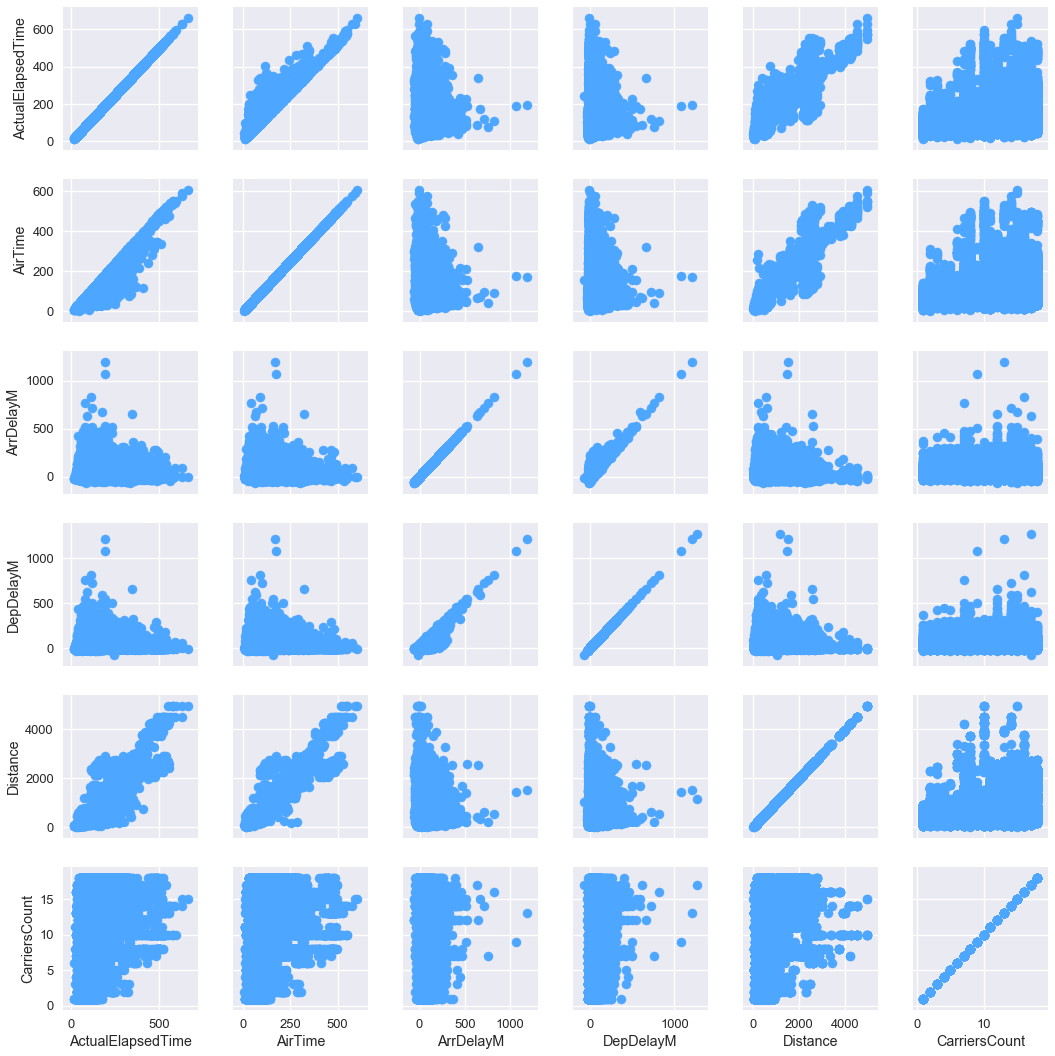

In [301]:
g = sb.PairGrid(data=y_2007_df,vars=desired_cols)
g.map(plt.scatter);

In [302]:
y_2007_df[desired_cols].corr()

,ActualElapsedTime,AirTime,ArrDelayM,DepDelayM,Distance,CarriersCount
ActualElapsedTime,1.000000,0.983488,0.082693,0.032496,0.951127,0.189185
AirTime,0.983488,1.000000,0.021397,0.016450,0.967834,0.175863
ArrDelayM,0.082693,0.021397,1.000000,0.928063,-0.005312,0.017629
DepDelayM,0.032496,0.016450,0.928063,1.000000,0.016212,0.020125
Distance,0.951127,0.967834,-0.005312,0.016212,1.000000,0.195444
CarriersCount,0.189185,0.175863,0.017629,0.020125,0.195444,1.000000


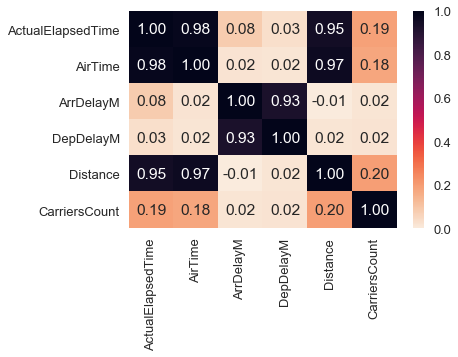

In [303]:
sb.heatmap(y_2007_df[desired_cols].corr(),annot=True,cmap='rocket_r',fmt='.2f',vmin=0)

# 18. Exploring TaxiIn and TaxiOut

# 19. Visualizing Data

#### comment here

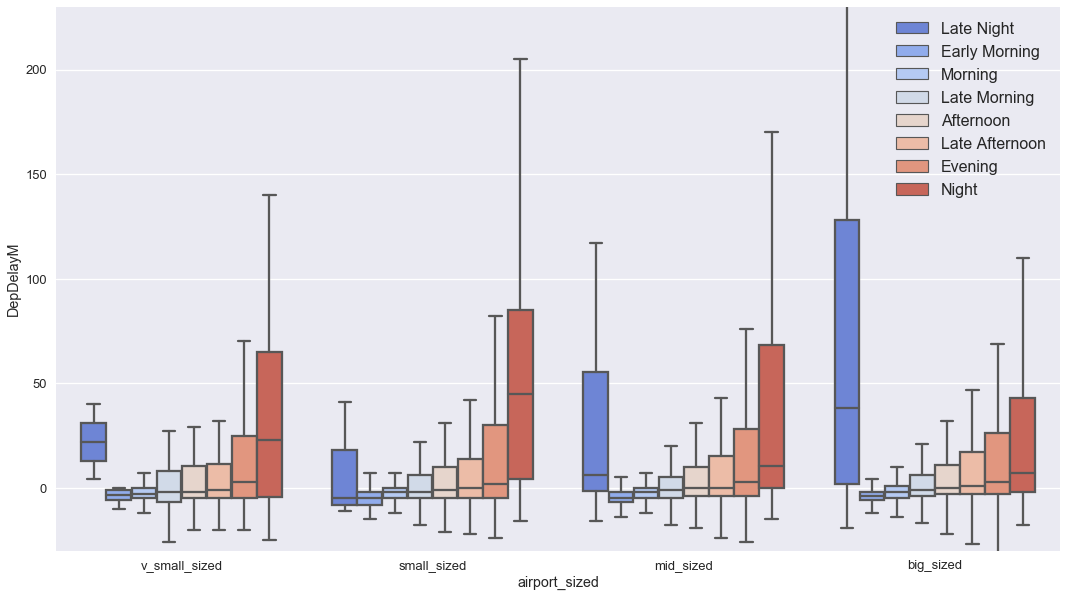

In [304]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
sb.boxplot(data=y_2007_df,y=y_2007_df.DepDelayM,x=y_2007_df.airport_sized,hue='DepTimeCategory'\
          ,showfliers=False,palette='coolwarm')

#plt.yscale('log')
plt.ylim(-30,230);
plt.legend(fontsize=16);

#### plot title here

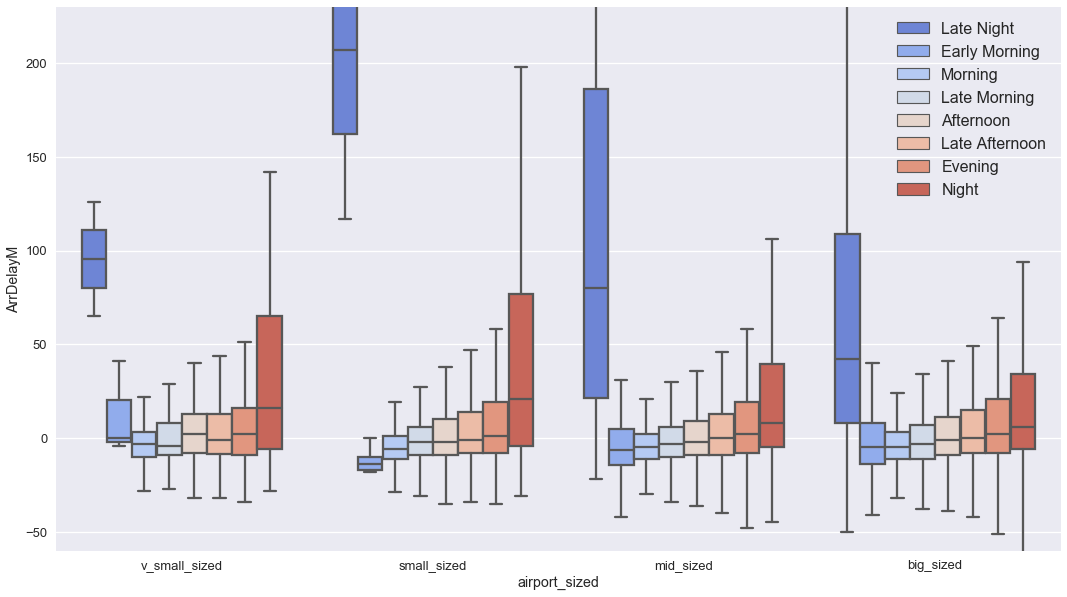

In [305]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
sb.boxplot(data=y_2007_df,y=y_2007_df.ArrDelayM,x=y_2007_df.airport_sized,hue='ArrTimeCategory'\
          ,showfliers=False,palette='coolwarm')
plt.ylim(-60,230)
plt.legend(fontsize=16);

#### plot title here

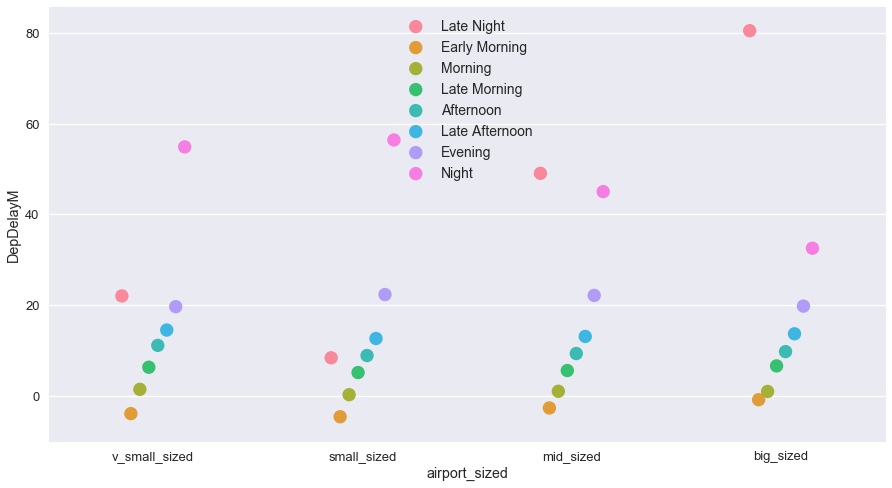

In [306]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=y_2007_df,y=y_2007_df.DepDelayM,x=y_2007_df.airport_sized,hue='DepTimeCategory',ci=None,
            linestyles='',dodge=0.3,)
plt.legend(fontsize=14);

#### plot title there

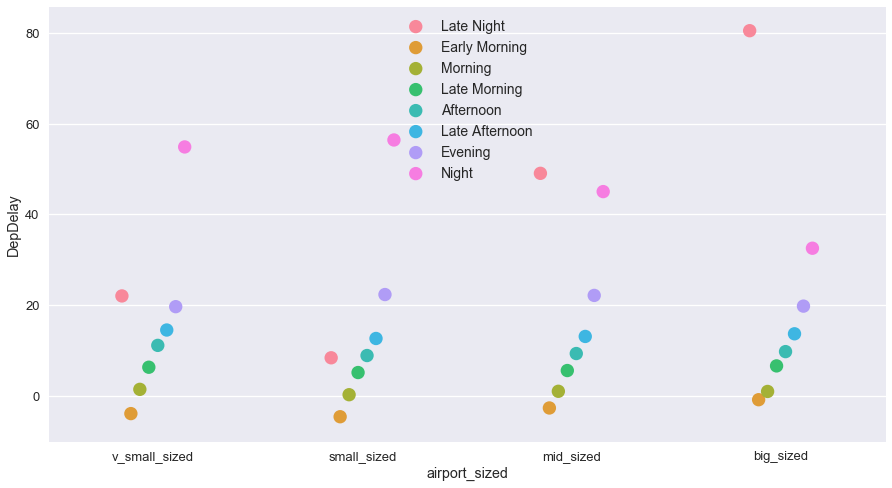

In [307]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=y_2007_df,y=y_2007_df.DepDelay,x=y_2007_df.airport_sized,hue='DepTimeCategory',ci=None,
            linestyles='',dodge=0.3)
plt.legend(fontsize=14);

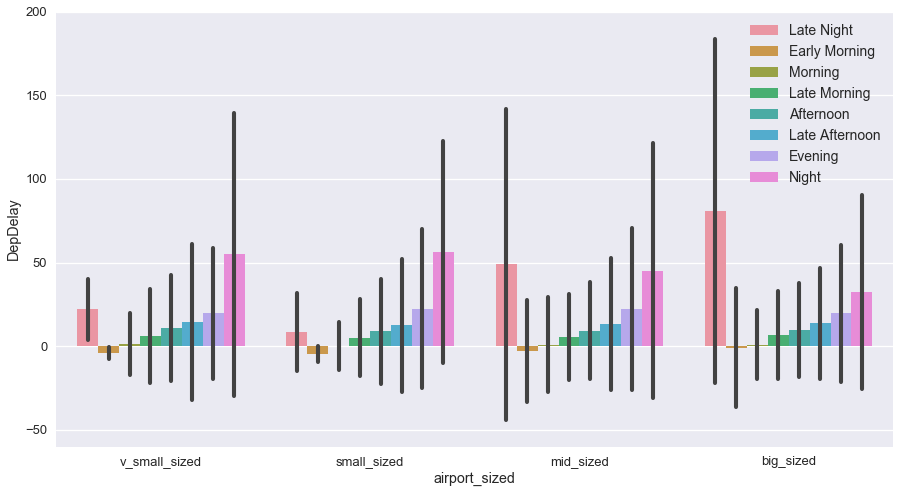

In [308]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.barplot(data=y_2007_df,y=y_2007_df.DepDelay,x=y_2007_df.airport_sized,hue='DepTimeCategory',ci='sd')
plt.legend(fontsize=14);
plt.ylim(-60,200);

In [309]:
plot_data = y_2007_df[(~y_2007_df.DepDelayM.isnull())]

In [310]:
ordered_data_df= plot_data[['CarrierDescription','DepDelayM']]

In [311]:
ordered_data_df.head()

,CarrierDescription,DepDelayM
0,Pinnacle Airlines Inc.,-1.0
1,Pinnacle Airlines Inc.,-3.0
2,Pinnacle Airlines Inc.,6.0
3,Pinnacle Airlines Inc.,-4.0
4,Pinnacle Airlines Inc.,22.0


In [312]:
ordered_data_df.groupby('CarrierDescription').mean()

,DepDelayM
CarrierDescription,
AirTran Airways Corporation,8.724855
Alaska Airlines Inc.,10.844817
Aloha Airlines Inc.,1.291111
American Airlines Inc.,14.482731
American Eagle Airlines Inc.,13.360472
Atlantic Southeast Airlines,19.857971
Comair Inc.,13.088731
Continental Air Lines Inc.,11.265791
Delta Air Lines Inc.,8.161087


In [313]:
#plot_data = y_2008_df[(~y_2008_df.DepDelayM.isnull()) & (y_2008_df.DepTimeCategory!='Late Night')]

In [314]:
plot_data.columns

Index(['UniqueCarrier', 'CarrierDescription', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'CombinedDate', 'DepDelayM', 'ArrDelayM',
       'DepTimeCategory', 'ArrTimeCategory', 'CarriersCount', 'airport_sized'],
      dtype='object')

In [315]:
plot_data.groupby('CarrierDescription')['DepDelayM'].mean().describe()

count    20.000000
mean     10.387730
std       4.716101
min      -1.370656
25%       8.583913
50%      11.055304
75%      13.156666
max      19.857971
Name: DepDelayM, dtype: float64

In [316]:
order_index = plot_data.groupby('CarrierDescription')['DepDelayM'].mean().sort_values().index

#### Consider putting the number of flights each carriers flies as hue or size.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

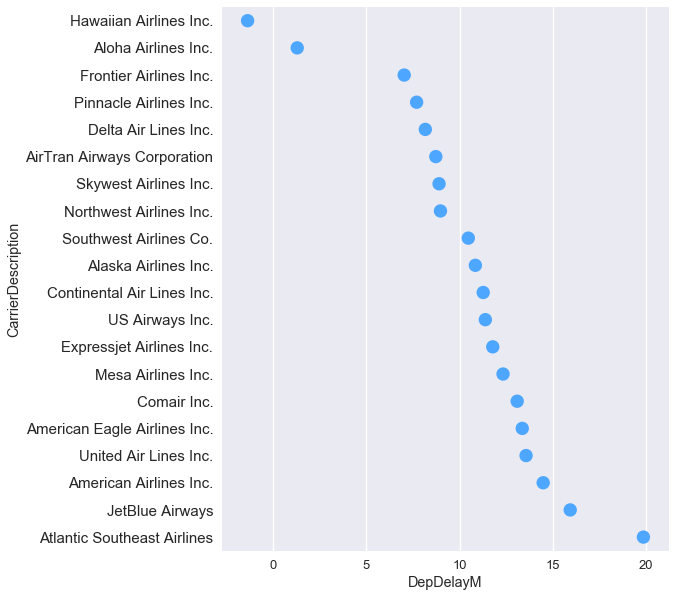

In [317]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=plot_data,y='CarrierDescription',x='DepDelayM',linestyles='',ci=None,order=order_index)
plt.yticks(fontsize=15)

# Savings Data

In [318]:
y_2007_df.to_csv('../y_2007_data',index=False)